
<h1><img src="https://tinyurl.com/3772ru94" width="60" height="60">  <strong>To Prompt or to Finetune?</strong></h1>
<h2><strong>State-of-the-Art techniques for Efficient Use of Large Language Models</strong></h2>



```
Author: Lorenzo Molfetta
Professor: Gianluca Moro

{name}.{surname}@unibo.it
```

_Alma Mater Studiorum Università di Bologna_

**Course**: TextMining & LLMs

**Research Group**: <mark><strong>UniboNLP@Cesena</strong></mark>

**Our website**: [link](https://disi-unibo-nlp.github.io)

<img src="https://drive.google.com/uc?export=view&id=1uskMMZ3v4QSDkC-eH5wTiTMmKiVfZFHs" width="300">

This laboratory presents from basic to complex algorithm to run and finetune Large Language Models.

We will delve into:
- Using the HuggingFace `transformers` library
- Model evalaution
- Prompting and decoding techniques
- Using QLoRA and `Unsloth` for low-resource finetuning
- Supervised and Reinforcement Learning Training

**REQUIREMENTS**

1) Create a HuggingFace account (https://huggingface.co)
2) Save your `HF_TOKEN` in the Colab "Secret" section (on the left panel 🔑)

## 📜 Outline

- [1 - Setup Kernel and Required Dependencies](#1)
- [2 - Understand How Language Models Work](#2)
    - [2.1 - Load the Model (Llama3.2-3B-Instruct)](#2.1)
    - [2.2 - What's the Input like?](#2.2)
    - [2.3 - What About the Output?](#2.3)
    - [2.4 - The effects of finetuning: Base, Instruct and Reasoning models](#2.4)
- [3 - Evaluate Generated Summaries with ROUGE](#3)
    - [3.1 - Understand ROUGE with an Example](#3.1)
    - [3.2 - What are the Limitations?](#3.2)
- [4 - Explore Dataset Loading and Decoding Strategies](#4)
    - [4.1 - XSUM Dataset](#4.1)
    - [4.2 - Dataset Statistics](#4.2)
    - [4.3 - Configure Generation Parameters](#4.3)
    - [4.4 - Define Test Function with Different Decoding Strategies](#4.4)
        - [4.4.1 - Understanding Decoding Strategies](#4.4.1)
    - [4.5 - Compare Decoding Strategies on XSUM](#4.5)
    - [4.6 - Visualize and Compare Results](#4.6)
- [5 - Summarize Dialogue with Prompt Engineering](#5)
    - [5.1 - Dataset and Model Loading](#5.1)
    - [5.2 - Summarize Dialogue without Prompt Engineering](#5.2)
    - [5.3 - Summarize Dialogue with an Instruction Prompt](#5.3)
        - [5.3.1 - Zero Shot Inference with an Instruction Prompt](#5.3.1)
        - [5.3.2 - Prompt Engineering Experiments](#5.3.2)
        - [5.3.3 - Zero Shot Inference with alternative Prompt Templates](#5.3.3)
    - [5.4 - Summarize Dialogue with One Shot and Few Shot Inference](#5.4)
        - [5.4.1 - One Shot Inference](#5.4.1)
        - [5.4.2 - Few Shot Inference](#5.4.2)
        - [5.4.3 - Compare Performances](#5.4.3)
- [6 - Parameter-Efficient Fine-tuning with QLoRA and Unsloth](#6)
    - [6.1 - Introduction to QLoRA and Unsloth](#6.1)
    - [6.2 - Supervised Fine-Tuning (SFT)](#6.2)
        - [6.2.1 - Unsloth Training](#6.3)
    - [6.3 - Group Relative Policy Optimization (GRPO) and Its Variants](#6.3)
        - [6.3.1 - Setup for GRPO](#6.3.1)
        - [6.3.2 - Load Model for GRPO Training](#6.3.2)
        - [6.3.3 - Prepare Dataset for GRPO](#6.3.3)
        - [6.3.4 - Define Reward Functions](#6.3.4)
        - [6.3.5 - Configure and Train with GRPO](#6.3.5)
        - [6.3.6 - Evaluate GRPO Model](#6.3.6)
        - [6.3.7 - Performance Comparison](#6.3.7)
        - [6.3.8 - Key Insights](#6.3.8)
- [7 - Bonus: Reinforcement Learning with Game Playing](#7)
    - [7.1 - The 2048 Game Environment](#7.1)
    - [7.2 - RL Task: Code Generation for Game Strategy](#7.2)
    - [7.3 - Defining the Prompt and Reward Functions](#7.3)
    - [7.4 - Training with GRPO](#7.4)
    - [7.5 - Testing the Trained Model](#7.5)

<a name='1'></a>
## ⚙️ 1 - Setup Kernel and Required Dependencies

First, check that the Runtime type is `Python 3` with a `GPU`-based hardware accelerator.

Go to "Runtime" $→$ "Change runtime type".

<a name='2'></a>
## 👨‍💻 2 - Understand How Language Models Work

Install dependencies...



In [ ]:
!python3 --version

Python 3.12.12


In [ ]:
# Install core packages
!pip install -q datasets==4.2.0 \
                torch==2.8.0 \
                transformers==4.56.2 \
                trl==0.23.0 \
                accelerate==1.10.1 \
                bitsandbytes==0.48.1 \
                unsloth==2025.10.1 \
                evaluate==0.4.6 \
                bert_score==0.3.13 \
                rouge_score==0.1.2 \
                nltk==3.9.2

KeyboardInterrupt: 

In [ ]:
!pip freeze > requirements.txt
from google.colab import files
files.download('requirements.txt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

> ‼️**RESTART RUNTIME**

Set a seed for reproducibility: we want to allow everyone to reproduce the experiments with the same results.

In [ ]:
from transformers import set_seed

set_seed(24)

<a name='2.1'></a>
### 2.1 - Load the Model

Let's load our first LLM from Huggingface!

Which model to choose? There are so many 🤕...


<img src="https://logo.svgcdn.com/l/meta.svg" width="200" alt="LLaMA (Meta)">
<img src="https://logo.svgcdn.com/l/mistral-ai.svg" width="150" alt="Mistral AI">
<img src="https://qianwen-res.oss-cn-beijing.aliyuncs.com/logo_qwen.jpg" width="200" alt="Qwen (Alibaba)">
<img src="https://hostkey.com/storage/phi-4_18346ad9.svg" width="150" alt="Phi (Microsoft)">
<img src="https://vectorseek.com/wp-content/uploads/2025/09/Google-gemma-Ai-Logo.png" width="100" alt="Gemma (Google)">
<img src="https://techbusiness.it/wp-content/uploads/2025/08/OpenAI-gpt-ossCover.webp" width="150" alt="GPT-OSS (OpenAI)">

![Model download from HF](https://cdn-uploads.huggingface.co/production/uploads/613b0a62a14099d5afed7830/qZw3S94rtE7aKizppYZFn.png)

_from ["Model statistics of the 50 most downloaded entities on Hugging Face"](https://huggingface.co/blog/lbourdois/huggingface-models-stats)_


**First, let's understand the main types of models:**
- **Base models**: Pre-trained on large corpora but not instruction-tuned (e.g., Llama-3.2-3B)
- **Instruct models**: Fine-tuned to follow instructions (e.g., Llama-3.2-3B-Instruct)
- **Reasoning models**: Specialized for complex reasoning tasks (e.g. Qwen3-4B)

For this tutorial, we'll use **Llama-3.2-3B-Instruct**, which is an instruction-tuned model that can understand and follow task-specific prompts.

> **Note:** There are many other ways of performing inferences with LLMs (<u>efficiently!!</u>). We will see them during the course. Let's just mention a few: **vLLM**, **Ollama**, **Llama.cpp**.

In [ ]:
from transformers import AutoTokenizer, AutoModelForCausalLM
import torch

def load_model(model_checkpoint):
    """
    Load the model and tokenizer.
    """

    # Load the tokenizer
    tokenizer = AutoTokenizer.from_pretrained(model_checkpoint)

    # Load the model
    model = AutoModelForCausalLM.from_pretrained(
        model_checkpoint,
        device_map="auto", # <--- Set "cpu", "cuda" or "mps" to explicitly set the device of interest
        dtype=torch.bfloat16 # <--- What's this format? Weren't there just float16 and float32?
    )

    # pad token setting for decoder-only models
    tokenizer.pad_token = tokenizer.eos_token
    tokenizer.pad_token_id = tokenizer.eos_token_id
    model.config.pad_token_id = tokenizer.pad_token_id

    return model, tokenizer

In [ ]:
model_names = {
    "gemma2": "google/gemma-2-2b-it",
    "gemma3": "google/gemma-3-270m-it",
    "qwen": "Qwen/Qwen3-0.6B",
    "falcon": "tiiuae/Falcon-H1-1B-Base",
}

executions = {
    "google/gemma-2-2b-it": {},
    "google/gemma-3-270m-it": {},
    "Qwen/Qwen3-0.6B": {},
    "tiiuae/Falcon-H1-1B-Base": {},
}

Let's load a base model and anlyze its structure.

In [ ]:
model_name = model_names["gemma3"]
model, tokenizer = load_model(model_name)

tokenizer_config.json:   0%|          | 0.00/1.16M [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/4.69M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/33.4M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/35.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/662 [00:00<?, ?B/s]

chat_template.jinja:   0%|          | 0.00/1.53k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.35k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/536M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/173 [00:00<?, ?B/s]

In [ ]:
model

Gemma3ForCausalLM(
  (model): Gemma3TextModel(
    (embed_tokens): Gemma3TextScaledWordEmbedding(262144, 640, padding_idx=0)
    (layers): ModuleList(
      (0-17): 18 x Gemma3DecoderLayer(
        (self_attn): Gemma3Attention(
          (q_proj): Linear(in_features=640, out_features=1024, bias=False)
          (k_proj): Linear(in_features=640, out_features=256, bias=False)
          (v_proj): Linear(in_features=640, out_features=256, bias=False)
          (o_proj): Linear(in_features=1024, out_features=640, bias=False)
          (q_norm): Gemma3RMSNorm((256,), eps=1e-06)
          (k_norm): Gemma3RMSNorm((256,), eps=1e-06)
        )
        (mlp): Gemma3MLP(
          (gate_proj): Linear(in_features=640, out_features=2048, bias=False)
          (up_proj): Linear(in_features=640, out_features=2048, bias=False)
          (down_proj): Linear(in_features=2048, out_features=640, bias=False)
          (act_fn): PytorchGELUTanh()
        )
        (input_layernorm): Gemma3RMSNorm((640,), eps

<a name='2.2'></a>
### 2.2 - What's the input like?

Understanding tokenization is crucial for working with LLMs. Let's explore how text is broken down into tokens:

- **Tokenization** converts text into numerical representations that the model can process
- Different models use different tokenization strategies
- The number of tokens affects model performance, cost, and context limits

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')

colors_list = [
    '102;194;165', '252;141;98', '141;160;203',
    '231;138;195', '166;216;84', '255;217;47'
]

def show_tokens(sentence, tokenizer):
    """
    Show highlighted tokens and input lengths.
    """
    token_ids = tokenizer(sentence).input_ids
    for idx, t in enumerate(token_ids):
        print(
            f'\x1b[0;30;48;2;{colors_list[idx % len(colors_list)]}m' +
            tokenizer.decode(t) +
            '\x1b[0m',
            end=' '
        )
    print("\n")
    print(token_ids)
    print(f"\n\nNumber of words: {len(nltk.word_tokenize(sentence))}\nNumber of tokens: {len(token_ids)}")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [ ]:
input_text = "How do large language models work?"

show_tokens(input_text, tokenizer)

How  do  large  language  models  work ? 

[4340, 653, 3460, 4128, 4119, 975, 30]


Number of words: 7
Number of tokens: 7


In [ ]:
input_text = "Look at this tokenization segmentation"

show_tokens(input_text, tokenizer)

Look  at  this  token ization  segmentation 

[10380, 518, 419, 3950, 2022, 59752]


Number of words: 5
Number of tokens: 6


<a name='2.3'></a>
### 2.3 - What About the Output?

Now let's explore how the model generates text:

- The model outputs **logits** (raw scores) for each token in the vocabulary
- These logits are converted to probabilities through softmax
- Generation strategies (greedy, sampling, beam search) determine which tokens are selected
- Modern LLMs can generate coherent, contextually relevant text

In [ ]:
import time

In [ ]:
start_time = time.time()

input_text = "Question:\nHow many years do i have if i was born in 1999 and we are in 2025? \nAnswer:\n"

# Tokenize the input text
inputs = tokenizer(input_text, return_tensors="pt") # return a pytorch tensor

# Tokenization returns two outputs
# - input_ids: the list of token IDS
# - attention_mask: a 0-1 vector to highlight what is padding in the input and what is not
input_ids, attention_mask = inputs.input_ids, inputs.attention_mask

# Move tensors to device (It's crucial that model and data are on the same device)
input_ids = input_ids.to(model.device)
attention_mask = attention_mask.to(model.device)

end_time = time.time()

print(f"Done with tokenization in {end_time - start_time} s")
executions[model_name]["tokenization"] = round(end_time - start_time, 4)

Done with tokenization in 0.003578662872314453 s


In [ ]:
input_ids, attention_mask

(tensor([[     2,  14977, 236787,    107,   3910,   1551,   1518,    776,    858,
             735,    768,    858,    691,   8132,    528, 236743, 236770, 236819,
          236819, 236819,    532,    692,    659,    528, 236743, 236778, 236771,
          236778, 236810, 236881, 236743,    107,   7925, 236787,    107]],
        device='cuda:0'),
 tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
          1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]], device='cuda:0'))

In [ ]:
input_ids.shape # [batch_size, seq_len]

torch.Size([1, 35])

In [ ]:
start_time = time.time()

# Prediction scores for each vocabulary token before SoftMax.
output = model(input_ids=input_ids, attention_mask=attention_mask)
logits = output.logits

end_time = time.time()

print(logits)
print("="*10)
print(logits.shape) # [batch_size, seq_length, vocab_dim]

print(f"executed in {end_time - start_time} s")
executions[model_name]["output_logits"] = round(end_time - start_time, 4)

tensor([[[ -8.1250,  -0.2227,  -1.5312,  ...,  -8.8750,  -8.8750,  -8.8750],
         [-15.1875,   1.3359,   0.1816,  ..., -14.3750, -14.4375, -14.3750],
         [-19.2500,   0.8047,   1.8125,  ..., -20.3750, -20.3750, -20.3750],
         ...,
         [ -9.1875,   7.0938,   7.8125,  ...,  -8.9375,  -8.9375,  -9.0000],
         [-15.3750,   0.6250,   1.1641,  ..., -15.3750, -15.4375, -15.3750],
         [-14.5625,  -3.1875,  -4.3125,  ..., -17.0000, -17.0000, -16.8750]]],
       device='cuda:0', dtype=torch.bfloat16, grad_fn=<UnsafeViewBackward0>)
torch.Size([1, 35, 262144])
executed in 0.06127429008483887 s


In [ ]:
stat_time = time.time()

# Generate at most 50 token
output_ids = model.generate(
    input_ids=input_ids,
    attention_mask=attention_mask,
    max_length=100,
    pad_token_id=tokenizer.pad_token_id
)

end_time = time.time()

print(output_ids)

print(f"executed in {end_time - start_time} s")
executions[model_name]["output_generation"] = round(end_time - start_time, 4)

tensor([[     2,  14977, 236787,    107,   3910,   1551,   1518,    776,    858,
            735,    768,    858,    691,   8132,    528, 236743, 236770, 236819,
         236819, 236819,    532,    692,    659,    528, 236743, 236778, 236771,
         236778, 236810, 236881, 236743,    107,   7925, 236787,    107,   1882,
            735, 236743, 236800, 236825, 236810,   1518, 236761,    107,  10081,
         236743, 236770, 236819, 236819, 236819,    563,    496,  42681,   1051,
         236764,    506,   1518,    659,  69330,    684, 236743, 236812, 236761,
            107,   4324, 236764,    692,    735, 236743, 236800, 236825, 236810,
           1518, 236761,    107,   9675, 236764,    506,   1518,    659,    711,
          12832,  69330,    684, 236743, 236812, 236761,    107,    818,   1548,
            529,   1518,    529,    506,   1051,    563, 236743, 236800, 236825,
         236810]], device='cuda:0')
executed in 59.31833052635193 s


In [ ]:
# WARNING: .generate() returns the input and generated output concatenated

output = tokenizer.batch_decode(output_ids[0][input_ids.shape[-1]:],
                                skip_special_tokens=True) # skip BOS-EOS tokens
formatted_output = ""
for token in output:
  formatted_output += token

print("\nOUTPUT:", formatted_output)

executions[model_name]["answer"] = formatted_output


OUTPUT: We have 365 years.
Since 1999 is a leap year, the years are divisible by 4.
So, we have 365 years.
However, the years are not necessarily divisible by 4.
The number of years of the year is 365


In [ ]:
executions

{'google/gemma-2-2b-it': {},
 'google/gemma-3-270m-it': {'tokenization': 0.0036,
  'output_logits': 0.0613,
  'output_generation': 3.4799,
  'answer': 'The number of years you have is 2025 - 1999 = 26 years.\n\nFinal Answer:\nThe final answer is 26\nFinal Answer:\n\nFinal Answer:\n\nFinal Answer:\nThe number of years you have is 26 years.\nFinal Answer:'},
 'Qwen/Qwen3-0.6B': {},
 'tiiuae/Falcon-H1-1B-Base': {}}

# Instruction tuned model works best with specific templates.
Here we will use 2 different versions which are basically the same, but the second version returns also the attention mask!

In [ ]:
model_name = model_names["gemma3"]
model, tokenizer = load_model(model_name)

In [ ]:
prompt = "How to cook pasta?"

messages = [
    {
        "role" :  "user",   # <--- user query
        "content" : "You are playing a game against another user A. You must choose either action1 or action2. Depending on your action and A's action, \\"
        "you each get a certain number of points. The goal is to score the highest number of points. The points are awarded as follows: \n \\"
        # "|         |  action1  |  action2  | \\"
        # "|---------|-----------|-----------| \\"
        # "| action1 |  3, 3     |  0, 5     | \\"
        # "| action2 |  5, 0     |  1, 1     | \n \\"
        "If you play action1 and A plays action1, you get 3 and A gets 3. \\"
        "If you play action1 and A plays action2, you get 0 and A gets 5. \\"
        "If you play action2 and A plays action1, you get 5 and A gets 0. \\"
        "If you play action2 and A plays action2, you get 1 and A gets 1. \n \\"
        # "Which action would you play if A plays action2? Do not explain your reasoning. \\"
        "You have played with this opponent before. Last time, you played action1 and they played action2, so you got 0 points and A got 5 points. "
        "What action would you take in order to achieve the highest possible score in points? \\"
        # "Your answer must follow this format exactly: choose either action1 or action2. Do not explain your reasoning. \\"
        "Your answer:"
        # "content" : prompt
    }
]

# inputs = tokenizer.apply_chat_template(messages,
#                                        tokenize=True,
#                                        return_tensors="pt",
#                                        add_generation_prompt=True
#                                        )
# inputs = inputs.to(model.device)

# output_ids = model.generate(
#     inputs,
#     max_new_tokens=256,
#     pad_token_id=tokenizer.pad_token_id
# )
# output = tokenizer.decode(output_ids[0][inputs.shape[-1]:],
#                           skip_special_tokens=True)

# print("\nOUTPUT:", output)

inputs = tokenizer.apply_chat_template(messages,          # or this sequence if you want inputs to have the attention mask
                                       tokenize=False,
                                       add_generation_prompt=True
                                       )

inputs = tokenizer(inputs, return_tensors="pt").to(model.device)

input_ids, attention_mask = inputs.input_ids, inputs.attention_mask

output_ids = model.generate(
    input_ids=input_ids,
    attention_mask=attention_mask,
    max_new_tokens=256,
    pad_token_id=tokenizer.pad_token_id
)
output = tokenizer.decode(output_ids[0][input_ids.shape[-1]:],
                          skip_special_tokens=True)

print("\nPROMPT:", prompt)
print("\nOUTPUT:", output)


PROMPT: How to cook pasta?

OUTPUT: Okay, I understand the rules. I will choose action1 if the action is '1' and action2 if the action is '2'.



🔎 **Insights**

LLMs often struggle with basic arithmetic, but not for the reasons one might initially assume. The issue stems from how numbers are tokenized, which is optimized for language efficiency rather than mathematical operations.

In most LLM tokenizers, including GPT-2's:
1. Single-token number representation:
   - The integers 0-9 don't each get their own unique token.
   - Instead, many multi-digit numbers are assigned single tokens.

2. Frequency-based tokenization - the image below shows the integers from 1 to 10k, with 100 per row. <mark>If a square is colored yellow it means a unique token is assigned to that integer and if it is purple then the integer is coded by a composite set of tokens</mark> in the GPT-2 tokenizer:
   - The first 512 integers each get a unique token.
   - Years between 1930 and 2019 also receive individual tokens.
   - This is due to their frequent occurrence in training data.

3. Inconsistent number representation:
   - Some numbers are represented by single tokens.
   - Others are broken into multiple tokens.
   - This lack of consistency complicates arithmetic processing.

4. Mathematical vs. linguistic optimization:
   - The tokenization is optimized for language modeling efficiency.
   - It's not designed with mathematical operations in mind.

5. Computational challenge:
   - Before performing calculations, the LLM must deconstruct these linguistically-optimized number representations.
   - This extra step introduces complexity and potential for error.



<img src="https://media.licdn.com/dms/image/v2/D4D22AQHSvid4S7Tznw/feedshare-shrink_800/feedshare-shrink_800/0/1727853729032?e=1763596800&v=beta&t=4Fbox0zuNv7f7yw8dV4O2evhSoH-mAp9anQPdKKVHkk" alt="Tokenizing Digits">

<br><br>

LLMs are terrible at spelling, too.

<img src="https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fimages.yourstory.com%2Fcs%2F2%2F07f6d7f0ed8e11ed819979969b4b51e2%2FScreenshot2024-08-28170555-1724844989903.png%3Ffm%3Dpng%26auto%3Dformat%26w%3D800%26blur%3D500&f=1&nofb=1&ipt=1d89891c42199a4deea73948a78d910e3d1384911e0c923ef5e2ad4b44c0a73b" alt="Strawbarry problem">

<br><br>

> What about handling different languages?!

Have a look at [this Linkedin post](https://www.linkedin.com/feed/update/urn:li:activity:7247143812853059584/) for more references

<a name='2.4'></a>
### 2.4 - The effects of finetuning: Base, Instruct and Reasoning models

🔎 **Insights**

Wait a second, when I use Claude I don't format the input with "Question:" and "Answer:".

Let's try with a "normal" prompt:

In [ ]:
input_text = "What's the capital of France?"

inputs = tokenizer(input_text, return_tensors="pt")
input_ids, attention_mask = inputs.input_ids, inputs.attention_mask
input_ids = input_ids.to(model.device)
attention_mask = attention_mask.to(model.device)

output_ids = model.generate(
    input_ids=input_ids,
    attention_mask=attention_mask,
    max_length=50,
    pad_token_id=tokenizer.pad_token_id
)
output = tokenizer.batch_decode(output_ids[0][input_ids.shape[-1]:],
                                skip_special_tokens=True)[0]

print("\nOUTPUT:", output)


OUTPUT:  What


⁉️ What " _What_ " is going on?

Base models are trained to complete a text, not to follow instructions.




#### Instruction-tuned LLMs
"Instruct" models are base-LLMs that have undergone a second fine-tuning phase directed at following instructions.

In [ ]:
model_name = "meta-llama/Llama-3.2-3B-Instruct"

model, tokenizer = load_model(model_name)

OSError: You are trying to access a gated repo.
Make sure to have access to it at https://huggingface.co/meta-llama/Llama-3.2-3B-Instruct.
403 Client Error. (Request ID: Root=1-691b3cc7-518c801551af7ead4018e43d;9d10730c-b4c1-4ccb-9f8d-5eaa403ac906)

Cannot access gated repo for url https://huggingface.co/meta-llama/Llama-3.2-3B-Instruct/resolve/main/config.json.
Your request to access model meta-llama/Llama-3.2-3B-Instruct has been rejected by the repo's authors.

In [ ]:
# Chat template: the ESSENTIAL preprocessing step when working with instruct models
# Let's analyze the conversion before tokenization is applied

messages = [
    {
        "role" :  "system", # <--- define the high-level directives for the model
        "content" : "You are a helpful, respectful and honest assistant."
    },
    {
        "role" :  "user",   # <--- user query
        "content" : "What's the capital of France?"
    }
]

inputs = tokenizer.apply_chat_template(messages, tokenize=False, add_generation_prompt=True)

print(inputs)


<|begin_of_text|><|start_header_id|>system<|end_header_id|>

Cutting Knowledge Date: December 2023
Today Date: 14 Oct 2025

You are a helpful, respectful and honest assistant.<|eot_id|><|start_header_id|>user<|end_header_id|>

What's the capital of France?<|eot_id|><|start_header_id|>assistant<|end_header_id|>




In [ ]:
inputs = tokenizer.apply_chat_template(messages,
                                       tokenize=True,
                                       add_generation_prompt=True,
                                       return_tensors="pt")

inputs = inputs.to(model.device)

output_ids = model.generate(
    inputs,
    max_new_tokens=256,
    pad_token_id=tokenizer.pad_token_id
)
output = tokenizer.decode(output_ids[0][inputs.shape[-1]:],
                          skip_special_tokens=True)

print("\nOUTPUT:", output)

The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.



OUTPUT: The capital of France is Paris.


We can now try with a more complex task.

In [ ]:
messages = [
    {
        "role" :  "system",
        "content" : "You are a mathematics professor at the university. Your task is to solve exercises correctly."
    },
    {
        "role" :  "user",
        "content" : "What is the smallest whole number that is equal to seven times the sum of its digits?"
    }
]
inputs = tokenizer.apply_chat_template(messages,
                                       tokenize=True,
                                       add_generation_prompt=True,
                                       return_tensors="pt")

inputs = inputs.to(model.device)

output_ids = model.generate(
    inputs,
    max_new_tokens=1024,
    pad_token_id=tokenizer.pad_token_id
)
output = tokenizer.decode(output_ids[0][inputs.shape[-1]:],
                          skip_special_tokens=True)

print("\nOUTPUT:", output)


OUTPUT: To find the smallest whole number that is equal to seven times the sum of its digits, we can start by listing numbers and calculating the sum of their digits.

1. For 1: 1 = 7 * 1 (1 is not equal to 7 times the sum of its digits)
2. For 2: 2 = 7 * 2 (2 is not equal to 7 times the sum of its digits)
3. For 3: 3 = 7 * 3 (3 is not equal to 7 times the sum of its digits)
4. For 4: 4 = 7 * 4 (4 is not equal to 7 times the sum of its digits)
5. For 5: 5 = 7 * 5 (5 is not equal to 7 times the sum of its digits)
6. For 6: 6 = 7 * 6 (6 is not equal to 7 times the sum of its digits)
7. For 18: 1 + 8 = 9, 18 = 7 * 9 (18 is equal to 7 times the sum of its digits)

Therefore, the smallest whole number that is equal to seven times the sum of its digits is 18.


... not exacty.

#### Reasoning LLMs
The latest research directions in the LLM field have explored the capabilities of models to produce a reasoning stack before providing the final answer. This is to account for the "_Rolling Snowball Effect_", where LLMs yeild incorrect conclusion after few errors in the premises.

From [Deepsek-R1](https://arxiv.org/abs/2501.12948) on, new model families were introduced to provide a rationale supporting the answer. In practice, this boils down to a simple intermediate generations usually between special tokens **$<$think$>$$<$/think$>$**.

Then Qwen3 family offer many models that execel at reasoning tasks. Let's try the question above with one of them.

In [ ]:
model_name = "google/gemma-2-2b-it" # <--- ONLY 600M params - basically an encoder

model, tokenizer = load_model(model_name)

tokenizer_config.json:   0%|          | 0.00/47.0k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/4.24M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.5M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/636 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/838 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/24.2k [00:00<?, ?B/s]

Fetching 2 files:   0%|          | 0/2 [00:00<?, ?it/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/4.99G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/241M [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/187 [00:00<?, ?B/s]

In [ ]:
messages = [
    {
        "role" :  "system",
        "content" : "You are a mathematics professor at the university. Your task is to solve exercises correctly."
    },
    {
        "role" :  "user",
        "content" : "What is the smallest whole number that is equal to seven times the sum of its digits?"
    }
]

inputs = tokenizer.apply_chat_template(messages,
                                       tokenize=True,
                                       add_generation_prompt=True,
                                       return_tensors="pt")

inputs = inputs.to(model.device)

output_ids = model.generate(
    inputs,
    max_new_tokens=4096,
    # we need to be very specific with the decoding params here
    temperature=0.6,
    top_p=0.95,
    top_k=20,
    min_p=0,
    pad_token_id=tokenizer.pad_token_id
)
output = tokenizer.decode(output_ids[0][inputs.shape[-1]:],
                          skip_special_tokens=True)

print("\nOUTPUT:", output)


KeyboardInterrupt: 

Reasoning can be **disabled** simply by working on the chat template.

In [ ]:
inputs = tokenizer.apply_chat_template(messages,
                                       tokenize=True,
                                       add_generation_prompt=True,
                                       enable_thinking=False, # <---- Disasble the thinking prehamble
                                       return_tensors="pt")

In [ ]:
print(tokenizer.decode(inputs[0]))

<|im_start|>system
You are a mathematics professor at the university. Your task is to solve exercises correctly.<|im_end|>
<|im_start|>user
What is the smallest whole number that is equal to seven times the sum of its digits?<|im_end|>
<|im_start|>assistant
<think>

</think>




> See how disabling thinking is just about adding an empty thinking space already inside the input prompt.

In [ ]:
inputs = inputs.to(model.device)

output_ids = model.generate(
    inputs,
    max_new_tokens=2048,
    temperature=0.7,
    top_p=0.8,
    top_k=20,
    min_p=0,
    pad_token_id=tokenizer.pad_token_id
)
output = tokenizer.decode(output_ids[0][inputs.shape[-1]:],
                          skip_special_tokens=True)

print("\nOUTPUT:", output)


OUTPUT: We are asked to find the **smallest whole number** that is equal to **seven times the sum of its digits**.

Let’s denote the number by $ N $, and let the sum of its digits be $ S $. Then:

$$
N = 7 \times S
$$

We want the smallest such $ N $.

---

### Step 1: Try small values of $ S $

Let’s test values of $ S $ and compute $ N $:

- $ S = 1 \Rightarrow N = 7 \times 1 = 7 $
- $ S = 2 \Rightarrow N = 14 $
- $ S = 3 \Rightarrow N = 21 $
- $ S = 4 \Rightarrow N = 28 $
- $ S = 5 \Rightarrow N = 35 $
- $ S = 6 \Rightarrow N = 42 $
- $ S = 7 \Rightarrow N = 49 $
- $ S = 8 \Rightarrow N = 56 $
- $ S = 9 \Rightarrow N = 63 $
- $ S = 10 \Rightarrow N = 70 $

We can see that for $ S = 10 $, $ N = 70 $.

Now check if this is the **smallest**:

- $ S = 1 \Rightarrow N = 7 $
- $ S = 2 \Rightarrow N = 14 $
- $ S = 3 \Rightarrow N = 21 $
- $ S = 4 \Rightarrow N = 28 $
- $ S = 5 \Rightarrow N = 35 $
- $ S = 6 \Rightarrow N = 42 $
- $ S = 7 \Rightarrow N = 49 $
- $ S = 8 \Rightarrow N = 56 $

This result demonstrate how the Qwen3 model is not just more intelligent than Llama3.2. It leverage the initial reasoning trace. Without it, the performances lower.

> ⚠️ **WARNING**: Watch the nomenclature
>
> We've seen many changes in base and instruct models naming. We went from the "**-ft**", to "**-instruct**" or "**-it**", and more recently to "_nothing_". Since instruct models are those most commonly used, companies like Alibaba decided to name their instruct models as "Qwen3-{_size_}B" and the relative base model as "Qwen3-{_size_}B-Base.
>
>This apparently natural name format lasted 6 months. Recently, Qwen came out with "Instruct" and "Thinking" extensions.
>
>Take-home-message: always check your model's type.

<a name='3'></a>
## 👨‍💻 3 - Evaluate Generated Summaries with ROUGE

**ROUGE** stands for Recall-Oriented Understudy for Gisting Evaluation.

ROUGE is the leading evaluation metric for text summarization that compares a model-generated summary against the reference human-annotated one. It works by matching the **n-grams overlaps** of the generated and gold summary. Several metrics are available:

* **ROUGE-1** refers to the **overlap of uni-grams** (each word) between the generated and reference summaries.

* **ROUGE-2** refers to the **overlap of bi-grams**  (pairs of words) between the generated and reference summaries.

* **ROUGE-L** identifies the longest n-grams co-occurring in the two sequences (**Longest Common Subsequence**).

The scores range from 0 to 1 (we report the %, i.e., between 0 and 100; the higher, the better).


Also the metric **ROUGE-LSUM** is usually reported. The word "sum" indicates that this metric is computed over a whole summary, while "Rouge-L" is computed as the average over individual sentences.

**Note:** since in our examples there is only one sentence for both the reference and prediction, "rougeL" and "rougeLsum" will be the same.

<a name='3.1'></a>
### 3.1 - Understand ROUGE with an Example

In [ ]:
import json
import evaluate
from rouge_score import rouge_scorer
import numpy as np

rouge = evaluate.load('rouge')
scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)

def get_rouge_scores(predictions, references):
    """
    Compute and return the ROUGE metrics (R1, R2, RL, each with precision, recall, f1 scores).
    """
    rouge_output = rouge.compute(predictions=predictions, references=references, use_stemmer=True)
    return rouge_output

def get_rouge_scores_enhanced(predictions, references):
    """
    Compute and return the ROUGE metrics (R1, R2, RL, each with precision, recall, f1 scores).
    """
    # Calculate scores for each prediction-reference pair
    all_scores = []
    for pred, ref in zip(predictions, references):
        scores = scorer.score(ref, pred)
        all_scores.append(scores)

    # Average across all samples
    def average_metric(metric_name):
        precisions = [s[metric_name].precision for s in all_scores]
        recalls = [s[metric_name].recall for s in all_scores]
        fmeasures = [s[metric_name].fmeasure for s in all_scores]
        return {
            'precision': np.mean(precisions),
            'recall': np.mean(recalls),
            'fmeasure': np.mean(fmeasures)
        }

    r1_avg = average_metric('rouge1')
    r2_avg = average_metric('rouge2')
    rL_avg = average_metric('rougeL')

    return {
        "r1-p": round(r1_avg['precision'] * 100, 2),
        "r1-r": round(r1_avg['recall'] * 100, 2),
        "r1-f1": round(r1_avg['fmeasure'] * 100, 2),
        "r2-p": round(r2_avg['precision'] * 100, 2),
        "r2-r": round(r2_avg['recall'] * 100, 2),
        "r2-f1": round(r2_avg['fmeasure'] * 100, 2),
        "rL-p": round(rL_avg['precision'] * 100, 2),
        "rL-r": round(rL_avg['recall'] * 100, 2),
        "rL-f1": round(rL_avg['fmeasure'] * 100, 2)
    }

In [ ]:
predictions = ["I absolutely loved reading the Hunger Games"]
references = ["i loved reading the Hunger Games."]

eval_scores = get_rouge_scores(predictions=predictions, references=references)
print("Evaluation Rouge Scores")
print("="*23)
print(json.dumps(eval_scores, indent=2))

scores = get_rouge_scores_enhanced(predictions=predictions, references=references)


print("\n\n Detailed Evaluation Rouge Scores")
print("="*33)
print(f'rouge-1:\t P:{scores["r1-p"]} \t R:{scores["r1-r"]} \t F1:{scores["r1-f1"]}')
print(f'rouge-2:\t P:{scores["r2-p"]} \t R:{scores["r2-r"]} \t F1:{scores["r2-f1"]}')
print(f'rouge-L:\t P:{scores["rL-p"]} \t R:{scores["rL-r"]} \t F1:{scores["rL-f1"]}')

Evaluation Rouge Scores
{
  "rouge1": 0.923076923076923,
  "rouge2": 0.7272727272727272,
  "rougeL": 0.923076923076923,
  "rougeLsum": 0.923076923076923
}


 Detailed Evaluation Rouge Scores
rouge-1:	 P:85.71 	 R:100.0 	 F1:92.31
rouge-2:	 P:66.67 	 R:80.0 	 F1:72.73
rouge-L:	 P:85.71 	 R:100.0 	 F1:92.31


**Note**: ROUGE is case-insensitive ("I" and "i" are the same) and does not consider punctuactions ("." in the reference).

For ROUGE, "recall" (R) measures how much of the reference summary is captured by the generated one (i.e., *how many words of the reference are within the prediction?*). If we are just comparing words, "recall" can be calculated according to the following formula:

$$Recall = \frac{\text{Number of overlapping words}}{\text{Total number of words in reference summary}}$$

For our simple example above, this formula gives a perfect recall of 6/6 = 1; i.e., *all the words in the reference summary have been produced by the model*.

This may sound great, but imagine if our generated summary had been "I really really loved reading the Hunger Games all night." This would also have perfect recall, but is arguably a worse summary since it is verbose. To deal with these scenarios, we also compute the "precision", which in the ROUGE context measures how much of the generated summary was relevant (i.e., *how many words of the prediction are within the reference?*):

$$Precision = \frac{\text{Number of overlapping words}}{\text{Total number of words in generated summary}}$$

Applying this to our verbose summary gives a "precision" of 6/10 = 0.6, which is considerably worse than the "precision" of 6/7 = 0.86 obtained by our shorter one (in the cell above). In practice, both "precision" and "recall" are usually computed, and then the "F1-score" (i.e., the harmonic mean of "precision" and "recall") is reported:

$$F_1 = 2 \cdot \frac{Precision \cdot Recall}{Precision + Recall}$$

<a name='3.2'></a>
### 3.2 - What are the Limitations?

1. The sentences are semantically the same (i.e., they have the same meaning), but ROUGE evaluates only the syntactic aspect.

In [ ]:
references = ["a big man is sad"]
predictions = ["the huge guy was not happy"]

scores = get_rouge_scores_enhanced(predictions=predictions, references=references)

print(f'rouge-1:\t P:{scores["r1-p"]} \t R:{scores["r1-r"]} \t F1:{scores["r1-f1"]}')
print(f'rouge-2:\t P:{scores["r2-p"]} \t R:{scores["r2-r"]} \t F1:{scores["r2-f1"]}')
print(f'rouge-L:\t P:{scores["rL-p"]} \t R:{scores["rL-r"]} \t F1:{scores["rL-f1"]}')

rouge-1:	 P:0.0 	 R:0.0 	 F1:0.0
rouge-2:	 P:0.0 	 R:0.0 	 F1:0.0
rouge-L:	 P:0.0 	 R:0.0 	 F1:0.0


2. The sentences have the same words, but ROUGE-2 and ROUGE-L consider the word position.

In [ ]:
references = ["a big man is sad"]
predictions = ["is sad a big man"]

scores = get_rouge_scores_enhanced(predictions=predictions, references=references)

print(f'rouge-1:\t P:{scores["r1-p"]} \t R:{scores["r1-r"]} \t F1:{scores["r1-f1"]}')
print(f'rouge-2:\t P:{scores["r2-p"]} \t R:{scores["r2-r"]} \t F1:{scores["r2-f1"]}')
print(f'rouge-L:\t P:{scores["rL-p"]} \t R:{scores["rL-r"]} \t F1:{scores["rL-f1"]}')

rouge-1:	 P:100.0 	 R:100.0 	 F1:100.0
rouge-2:	 P:75.0 	 R:75.0 	 F1:75.0
rouge-L:	 P:60.0 	 R:60.0 	 F1:60.0


3. The sentences have opposite meaning, but ROUGE does not fully capture this.

In [ ]:
references = ["a big man born in New York is sad"]
predictions = ["a big man born in New York is not sad"]

scores = get_rouge_scores_enhanced(predictions=predictions, references=references)

print(f'rouge-1:\t P:{scores["r1-p"]} \t R:{scores["r1-r"]} \t F1:{scores["r1-f1"]}')
print(f'rouge-2:\t P:{scores["r2-p"]} \t R:{scores["r2-r"]} \t F1:{scores["r2-f1"]}')
print(f'rouge-L:\t P:{scores["rL-p"]} \t R:{scores["rL-r"]} \t F1:{scores["rL-f1"]}')

rouge-1:	 P:90.0 	 R:100.0 	 F1:94.74
rouge-2:	 P:77.78 	 R:87.5 	 F1:82.35
rouge-L:	 P:90.0 	 R:100.0 	 F1:94.74


<a name='4'></a>
## 👨‍💻 4 - Explore Dataset Loading and Decoding Strategies

In this section, we'll load the XSUM dataset and explore different decoding strategies (Greedy, Beam Search, Nucleus Sampling) for text generation. Understanding these strategies is crucial for controlling the quality and diversity of model outputs.

<a name='4.1'></a>
### 4.1 - XSUM Dataset

We explore [XSum](https://huggingface.co/datasets/EdinburghNLP/xsum), one of the most known datasets for Text Summarization. It contains over 200K BBC articles with the corresponding manually labeled one-sentence summary.

In [ ]:
# We shall use LLama for this part
model_name = "meta-llama/Llama-3.2-3B-Instruct"
model, tokenizer = load_model(model_name)

tokenizer_config.json:   0%|          | 0.00/54.5k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.09M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/296 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/878 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/20.9k [00:00<?, ?B/s]

Fetching 2 files:   0%|          | 0/2 [00:00<?, ?it/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/4.97G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/1.46G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/189 [00:00<?, ?B/s]

Download the dataset...


In [ ]:
from datasets import load_dataset

xsum = load_dataset("yairfeldman/xsum")

print(xsum)

xsum_train = xsum["train"]
xsum_eval = xsum["validation"]
xsum_test = xsum["test"]

README.md:   0%|          | 0.00/573 [00:00<?, ?B/s]

data/train-00000-of-00001.parquet:   0%|          | 0.00/304M [00:00<?, ?B/s]

data/validation-00000-of-00001.parquet:   0%|          | 0.00/16.7M [00:00<?, ?B/s]

data/test-00000-of-00001.parquet:   0%|          | 0.00/17.0M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/204045 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/11332 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/11334 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['document', 'summary', 'id'],
        num_rows: 204045
    })
    validation: Dataset({
        features: ['document', 'summary', 'id'],
        num_rows: 11332
    })
    test: Dataset({
        features: ['document', 'summary', 'id'],
        num_rows: 11334
    })
})


In [ ]:
import datasets
import random
import pandas as pd
from IPython.display import display, HTML


def show_random_samples(dataset, num_examples=3):
    """
    Show random samples from a dataset.
    """
    assert num_examples <= len(dataset), "Can't pick more samples than there are in the dataset."
    picks = []
    for _ in range(num_examples):
        pick = random.randint(0, len(dataset) - 1)
        while pick in picks:
            pick = random.randint(0, len(dataset) - 1)
        picks.append(pick)

    df = pd.DataFrame(dataset[picks])
    for column, typ in dataset.features.items():
        if isinstance(typ, datasets.ClassLabel):
            df[column] = df[column].transform(lambda i: typ.names[i])
    display(HTML(df.to_html()))

In [ ]:
show_random_samples(xsum_train)

,document,summary,id
0,"Private Harry Vasey, who was part of the 1st Airborne Battalion, The Border Regiment, was killed during Operation Market Garden in Oosterbeek in 1944.\nNow his identity has been confirmed, the Ministry of Defence (MoD) want to trace his family so his grave can be rededicated in the Netherlands.\nThe MoD said plans were also in place to change his headstone.\nBorn in Durham in May 1916 to Harry Vasey and Annie Young, he enlisted in April 1940 when he lived in Bowburn, County Durham.\nAn MoD spokesman said: ""Unfortunately that is about all we know about Private Vasey and his family and that's where the trail goes cold.\n""We are hoping that there are some of his family still living in that area.""\nSince WW2, a section of the Royal Netherlands Army has been working to identify the graves of unknown soldiers killed in battle.\nThe exhumation reports were scrutinised for clues to the identities of these men and the research was presented to the MoD.\nMr Vasey is one of six Border Regiment soldiers, including Lance Corporal Raymond Halliday, to be indentified.\nThe aim of Operation Market Garden was to take strategic bridges near Arnhem, but the Allies underestimated the number of German troops lying in wait and it failed.\nMore than 1,400 Allied troops died and more than 6,000 were captured by German forces.\nIt is hoped Mr Vasey's surviving relatives can attend the service at Oosterbeek Cemetery on 14 September in honour of his sacrifice and bravery, the MoD said.",The family of a soldier killed during World War Two is being sought after his final resting place was confirmed.,36802710
1,"Hooker Richard Hibbard and prop John Afoa return as David Humphreys makes 10 changes to the team which beat the French side 35-14 on 8 December.\nLewis Ludlow, Jacob Rowan and Ben Morgan also start in the pack, while Callum Braley starts at scrum-half.\nJames Hook takes David Halaifonua's spot at full-back, with Jonny May and Charlie Sharples on the wings.\nStade Rochelais: Murimurivalu; Lacroix, Jordaan, Aguillon, Rattez; James, Bales; Corbel, Forbes, Atonio, Qovu, Tanguy, Sazy, Eaton (capt.), Vito.\nReplacements: Maurouard, Priso, Boughanmi, Cedaro, Francoz, Retiere, Holmes, Botia.\nGloucester: Hook; Sharples, Scott, Atkinson, May; Burns, Braley (capt.); Hohneck, Hibbard, Afoa, Savage, Thrush, Ludlow, Rowan, Morgan.\nReplacements: Matu'u, Thomas, Doran-Jonesm Latta, Galarza, Heinz, Purdy, Kvesic.\nFor the latest rugby union news follow @bbcrugbyunion on Twitter.",Gloucester lock Jeremy Thrush will make his first appearance of the season against Stade Rochelais.,38307773
2,"The university announced back in March it needed to save £10.5m and planned to cut 150 posts.\nMembers of the University and College Union (UCU) Scotland were balloted as a result.\nAfter the ballot closed on Monday, the union said 73% of those who voted backed strike action. And 80% also voted for action short of a strike.\nAndrew MacKillop, Aberdeen UCU representative, said: ""Members have made it quite clear that they reject the job losses proposed by the university.\n""Strike action is always a last resort but we can't sit back and see jobs lost with the accompanying damage to the student experience and the reputation of the university.""\nIn a statement, the university said it was disappointed that the union had vote for strike action ""in the midst of ongoing dialogue"".\nIt added: ""According to the results of the ballot, 263 UCU members voted in favour of strike action, representing 12.5% of our total academic and academic-related workforce.\n""The UCU had asked for assurance that the university would rule out compulsory redundancies as it seeks to make savings of £10.5m.\n""We were unable to give that assurance, although we are working tirelessly to achieve the savings we need through voluntary measures as far as possible, and are pursuing a range of additional options to increase our efficiency as a world-leading university.""",Staff at the 

<a name='4.2'></a>
### 4.2 - Dataset Statistics

Let's compute some statistics over data.

In [ ]:
# Calculate statistics for the train split (a subset due to time constraints)
from tqdm import tqdm
import nltk
nltk.download('punkt_tab')


SPLIT_SIZE = 1000

# Combine all splits
print("[STATS] Merging split")
all_docs = xsum['train']['document'][:SPLIT_SIZE]
all_summaries = xsum['train']['summary'][:SPLIT_SIZE]

# Calculate word counts
print("[STATS] Word count..")
doc_word_counts = [len(nltk.word_tokenize(doc)) for doc in tqdm(all_docs, desc="Counting words in input documents")]
summary_word_counts = [len(nltk.word_tokenize(summ)) for summ in tqdm(all_summaries, desc="Counting words in summarized documents")]

# Calculate token counts (using tokenizer from earlier)
print("[STATS] Token count..")
doc_token_counts = [len(tokenizer(doc).input_ids) for doc in tqdm(all_docs, desc="Counting tokens in input documents")]
summary_token_counts = [len(tokenizer(summ).input_ids) for summ in tqdm(all_summaries, desc="Counting tokens in input documents")]

print("=== XSUM Dataset Statistics (All Splits Combined) ===\n")
print(f"Documents - Average words: {sum(doc_word_counts)/len(doc_word_counts):.2f}")
print(f"Documents - Average tokens: {sum(doc_token_counts)/len(doc_token_counts):.2f}")
print(f"Summaries - Average words: {sum(summary_word_counts)/len(summary_word_counts):.2f}")
print(f"Summaries - Average tokens: {sum(summary_token_counts)/len(summary_token_counts):.2f}")

# Calculate compression ratio
print("[STATS] text-to-summary length ration..")
avg_compression = sum(doc_word_counts) / sum(summary_word_counts)
print(f"\nAverage compression ratio: {avg_compression:.2f}x")

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


[STATS] Merging split
[STATS] Word count..


Counting words in summarized documents: 100%|██████████| 1000/1000 [00:00<00:00, 12771.94it/s]


[STATS] Token count..


Counting tokens in input documents: 100%|██████████| 1000/1000 [00:00<00:00, 9650.95it/s]

=== XSUM Dataset Statistics (All Splits Combined) ===

Documents - Average words: 417.39
Documents - Average tokens: 459.19
Summaries - Average words: 23.17
Summaries - Average tokens: 27.13
[STATS] text-to-summary length ration..

Average compression ratio: 18.01x


Based on the dataset, we take the name of the input and target columns.

In [ ]:
text_column = "document"
summary_column = "summary"

To save time, we use just the first 10 samples of the test set.

In [ ]:
max_test_samples = 10

test_dataset = xsum_test.select(range(min(len(xsum_test), max_test_samples)))

<a name='4.3'></a>
### 4.3 - Configure Generation Parameters

Before we can generate summaries, we need to define the parameters that control how the model generates text. These include length constraints and decoding strategies.

In [ ]:
# Generation parameters for summarization
max_source_length = 1024  # Maximum length of input text
min_target_length = 10    # Minimum length of generated summary
max_target_length = 50    # Maximum length of generated summary
no_repeat_ngram_size = 3  # Prevent repeating n-grams (avoid repetition)

print(f"Generation parameters configured")
print(f"  - Max input length: {max_source_length}")
print(f"  - Summary length: {min_target_length}-{max_target_length} tokens")
print(f"  - No repeat n-gram size: {no_repeat_ngram_size}")

Generation parameters configured
  - Max input length: 1024
  - Summary length: 10-50 tokens
  - No repeat n-gram size: 3


<a name='4.4'></a>
### 4.4 - Define Test Function with Different Decoding Strategies

Now let's define a `test` function that can generate summaries using different decoding algorithms:
- **Greedy Search**: Always picks the most likely next token (deterministic)
- **Beam Search**: Explores multiple paths and picks the best overall sequence
- **Nucleus (Top-p) Sampling**: Randomly samples from the most likely tokens

This allows us to compare how different decoding strategies affect the quality and diversity of generated summaries.

In [ ]:
from torch.utils.data import DataLoader
from tqdm import tqdm
import torch

BASIC_PROMPT = """
Your task is to summarize a given text. Return directly and only the summarized text. No prehamble or comment are allowed.

Now summarize this text:
{text}
"""


def test(model, tokenizer, dataset, text_column, summary_column,
         max_source_length, min_target_length, max_target_length, no_repeat_ngram_size,
         epoch=None, is_eval=False, decoding_strategy="greedy", num_beams=4, top_p=0.95, temperature=0.7, batch_size=2):
    """
    Generate summaries using different decoding strategies.

    Args:
        model: The language model to use for generation
        tokenizer: The tokenizer for the model
        dataset: Dataset containing documents to summarize
        text_column: Name of the column containing input text
        summary_column: Name of the column containing reference summaries
        max_source_length: Maximum length of input documents
        min_target_length: Minimum length of generated summaries
        max_target_length: Maximum length of generated summaries
        no_repeat_ngram_size: Size of n-grams that shouldn't repeat
        epoch: Current epoch number (for logging)
        is_eval: Whether this is evaluation or test
        decoding_strategy: One of "greedy", "beam", or "nucleus"
        num_beams: Number of beams for beam search (default: 4)
        top_p: Cumulative probability for nucleus sampling (default: 0.95)
        temperature: Temperature for sampling (default: 0.7)
        batch_size: Batch size for dataloader (default: 2)

    Returns:
        List of generated summary strings
    """
    if is_eval and epoch is not None:
        print(f"***** Running validation (Epoch {epoch + 1}) *****")
    else:
        print(f"***** Running test with {decoding_strategy.upper()} decoding *****")

    print(f"  Num examples = {len(dataset)}")
    print(f"  Decoding strategy = {decoding_strategy}")

    # Create dataloader
    dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=False)

    # Set model to eval mode (do not compute and store gradients)
    model.eval()

    predictions = []

    with torch.no_grad():
        progress_bar = tqdm(dataloader, desc=f"Generating ({decoding_strategy})")

        for batch in progress_bar:
            # Get input documents
            documents = batch[text_column]

            # Apply chat template with summarization prompt
            chat_inputs = []
            for doc in documents:
                messages = [
                    {"role": "user", "content": BASIC_PROMPT.format(text=doc)}
                ]
                chat_text = tokenizer.apply_chat_template(
                    messages,
                    tokenize=False,
                    add_generation_prompt=True
                )
                chat_inputs.append(chat_text)

            # Tokenize batched inputs
            inputs = tokenizer(
                chat_inputs,
                max_length=max_source_length,
                padding=True,
                padding_side='left',
                truncation=True,
                return_tensors="pt"
            ).to(model.device)

            # Configure generation based on decoding strategy
            generation_config = {
                "pad_token_id": tokenizer.pad_token_id,
                "max_new_tokens": max_target_length,
                "min_new_tokens": min_target_length,
                "no_repeat_ngram_size": no_repeat_ngram_size,
            }

            if decoding_strategy == "greedy":
                # Greedy: always pick the most likely token
                generation_config["do_sample"] = False
                generation_config["num_beams"] = 1

            elif decoding_strategy == "beam":
                # Beam search: explore multiple paths
                generation_config["do_sample"] = False
                generation_config["num_beams"] = num_beams
                generation_config["early_stopping"] = True  # Only valid with beam search
                generation_config["length_penalty"] = 1.0

            elif decoding_strategy == "nucleus":
                # Nucleus sampling: sample from top-p tokens
                generation_config["do_sample"] = True
                generation_config["top_p"] = top_p
                generation_config["temperature"] = temperature

            # Generate summaries
            outputs = model.generate(
                input_ids=inputs["input_ids"],
                attention_mask=inputs["attention_mask"],
                **generation_config
            )

            generated_tokens = outputs[:, inputs["input_ids"].shape[-1]:]
            decoded = tokenizer.batch_decode(generated_tokens, skip_special_tokens=True)
            predictions.extend(decoded)

    print(f"  Generated {len(predictions)} summaries")
    return predictions

<a name='4.4.1'></a>
#### 4.4.1 - Understanding Decoding Strategies

**1. Greedy Search** (`decoding_strategy="greedy"`)
- At each step, picks the token with highest probability
- **Pros**: Fast, deterministic, consistent results
- **Cons**: Can be repetitive, may miss better overall sequences
- **Best for**: Quick generation, when speed matters

**2. Nucleus (Top-p) Sampling** (`decoding_strategy="nucleus"`, `top_p=0.95`)
- Randomly samples from the smallest set of tokens whose cumulative probability exceeds `top_p`
- Temperature controls randomness (lower = more focused, higher = more random)
- **Pros**: Diverse outputs, creative, avoids repetition
- **Cons**: Non-deterministic, sometimes off-topic
- **Best for**: When you want variety and creativity

**3. Beam Search** (`decoding_strategy="beam"`, `num_beams=4`)
- Maintains `num_beams` hypotheses and explores multiple paths
- Selects the sequence with highest overall probability
- **Pros**: Better quality, more coherent
- **Cons**: Slower than greedy, still somewhat deterministic
- **Best for**: When quality matters more than speed



<a name='4.5'></a>
### 4.5 - Compare Decoding Strategies on XSUM

Now let's test all three decoding strategies on the XSUM dataset and compare their performance using ROUGE metrics.

In [ ]:
test_split = xsum_test.select(range(25))

# Test with GREEDY decoding (deterministic, fastest)
predictions_greedy = test(
    model, tokenizer, test_split, text_column, summary_column, max_source_length,
    min_target_length, max_target_length, no_repeat_ngram_size, epoch=None, is_eval=False, batch_size=4,
    decoding_strategy="greedy"
)

# Test with NUCLEUS SAMPLING (stochastic, more diverse)
predictions_nucleus = test(
    model, tokenizer, test_split, text_column, summary_column, max_source_length,
    min_target_length, max_target_length, no_repeat_ngram_size, epoch=None, is_eval=False, batch_size=4,
    decoding_strategy="nucleus", top_p=0.95, temperature=0.7
)

# Test with BEAM SEARCH (explores multiple paths, better quality)
predictions_beam = test(
    model, tokenizer, test_split, text_column, summary_column, max_source_length,
    min_target_length, max_target_length, no_repeat_ngram_size, epoch=None, is_eval=False, batch_size=4,
    decoding_strategy="beam", num_beams=4
)

# Evaluate all strategies with ROUGE
print("\n" + "="*80)
print("COMPARISON OF DECODING STRATEGIES")
print("="*80)

rouge_greedy = get_rouge_scores(predictions=predictions_greedy, references=test_split[summary_column])
print(f"\n🎯 GREEDY SEARCH:")
print(f"   ROUGE-1: {rouge_greedy['rouge1']:.2f}")
print(f"   ROUGE-2: {rouge_greedy['rouge2']:.2f}")
print(f"   ROUGE-L: {rouge_greedy['rougeL']:.2f}")

rouge_nucleus = get_rouge_scores(predictions=predictions_nucleus, references=test_split[summary_column])
print(f"\n🎲 NUCLEUS SAMPLING (top-p=0.95):")
print(f"   ROUGE-1: {rouge_nucleus['rouge1']:.2f}")
print(f"   ROUGE-2: {rouge_nucleus['rouge2']:.2f}")
print(f"   ROUGE-L: {rouge_nucleus['rougeL']:.2f}")

rouge_beam = get_rouge_scores(predictions=predictions_beam, references=test_split[summary_column])
print(f"\n🔍 BEAM SEARCH (4 beams):")
print(f"   ROUGE-1: {rouge_beam['rouge1']:.2f}")
print(f"   ROUGE-2: {rouge_beam['rouge2']:.2f}")
print(f"   ROUGE-L: {rouge_beam['rougeL']:.2f}")

print("\n" + "="*80)

***** Running test with GREEDY decoding *****
  Num examples = 25
  Decoding strategy = greedy


Generating (greedy): 100%|██████████| 7/7 [01:52<00:00, 16.14s/it]


  Generated 25 summaries
***** Running test with NUCLEUS decoding *****
  Num examples = 25
  Decoding strategy = nucleus


Generating (nucleus): 100%|██████████| 7/7 [01:56<00:00, 16.69s/it]


  Generated 25 summaries
***** Running test with BEAM decoding *****
  Num examples = 25
  Decoding strategy = beam


Generating (beam): 100%|██████████| 7/7 [05:20<00:00, 45.84s/it]


  Generated 25 summaries

COMPARISON OF DECODING STRATEGIES

🎯 GREEDY SEARCH:
   ROUGE-1: 0.22
   ROUGE-2: 0.04
   ROUGE-L: 0.15

🎲 NUCLEUS SAMPLING (top-p=0.95):
   ROUGE-1: 0.22
   ROUGE-2: 0.04
   ROUGE-L: 0.16

🔍 BEAM SEARCH (4 beams):
   ROUGE-1: 0.24
   ROUGE-2: 0.06
   ROUGE-L: 0.17



<a name='4.6'></a>
### 4.6 - Visualize and Compare Results

Let's examine a specific example to see how each decoding strategy produces different summaries for the same input document.

In [ ]:
# Compare the first example across all decoding strategies
dash_line = '-'.join('' for x in range(100))
idx = 0

print(dash_line)
print(f'📄 INPUT DOCUMENT (truncated):\n{xsum_test[text_column][idx][:200]}...')
print(dash_line)
print(f'✅ HUMAN SUMMARY:\n{xsum_test[summary_column][idx]}')
print(dash_line)
print(f'🎯 GREEDY SEARCH:\n{predictions_greedy[idx]}')
print(dash_line)
print(f'🎲 NUCLEUS SAMPLING:\n{predictions_nucleus[idx]}')
print(dash_line)
print(f'🔍 BEAM SEARCH:\n{predictions_beam[idx]}')
print(dash_line)

---------------------------------------------------------------------------------------------------
📄 INPUT DOCUMENT (truncated):
Prison Link Cymru had 1,099 referrals in 2015-16 and said some ex-offenders were living rough for up to a year before finding suitable accommodation.
Workers at the charity claim investment in housing...
---------------------------------------------------------------------------------------------------
✅ HUMAN SUMMARY:
There is a "chronic" need for more housing for prison leavers in Wales, according to a charity.
---------------------------------------------------------------------------------------------------
🎯 GREEDY SEARCH:
Prison Leavers Struggle to Find Accommodation in Wales. Prison Link Cymbu reported 1.099 referrals for 201-16, with some ex-offsenders living rough before finding accommodation. The charity claims investing in housing is cheaper than
---------------------------------------------------------------------------------------------------
🎲 

> **What do you notice?**
>
> Visually, from a human point of view, the generated summaries are well written. However, here the point is: how good are the references we are comparing to?
>
> This is the core of interest of **Controllable Summarization**. In **abstractive** summarization tasks, where no specific information is expected to be extracted or inferred, style becomes a key influential aspect. In this example, the gold summary is short and almost telegraphic.
>
> LLMs are good at following extraction. We thus need to provide additional information to the overall task outline.

<a name='5'></a>
## 👨‍💻 5 - Summarize Dialogues with Prompt Engineering

In this part of the lab you will do the dialogue summarization task using prompt modulations. You will explore **how the input text affects the output of the model**, and perform **prompt engineering** to direct it towards the task you need. By comparing zero shot, one shot, and few shot inferences, you will take the first step towards prompt engineering and see how it can enhance the generative output of LLMs.


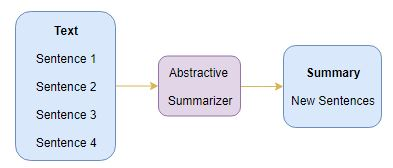



*   Generation of **new sentences** providing the document's most relevant information

*   **Human-like** process

*   The summary is usually **fluent** but may contain **hallucinations**!

*   **More challenging** task


<a name='5.1'></a>
### 5.1 - Dataset and Model Loading

In this use case, you will be generating a summary of a dialogue from the [DialogSum](https://huggingface.co/datasets/knkarthick/dialogsum) dataset. This dataset contains 10,000+ dialogues with the corresponding manually labeled summaries and topics.

In [ ]:
from datasets import load_dataset

huggingface_dataset_name = "knkarthick/dialogsum"

dataset = load_dataset(huggingface_dataset_name)

Print a couple of dialogues with their baseline summaries.

In [ ]:
example_indices = [40, 200]

dash_line = '-'.join('' for x in range(100))

for i, index in enumerate(example_indices):
    print(dash_line)
    print('Example ', i + 1)
    print(dash_line)
    print('INPUT DIALOGUE:')
    print(dataset['test'][index]['dialogue'])
    print(dash_line)
    print('BASELINE HUMAN SUMMARY:')
    print(dataset['test'][index]['summary'])
    print(dash_line)
    print()

---------------------------------------------------------------------------------------------------
Example  1
---------------------------------------------------------------------------------------------------
INPUT DIALOGUE:
#Person1#: What time is it, Tom?
#Person2#: Just a minute. It's ten to nine by my watch.
#Person1#: Is it? I had no idea it was so late. I must be off now.
#Person2#: What's the hurry?
#Person1#: I must catch the nine-thirty train.
#Person2#: You've plenty of time yet. The railway station is very close. It won't take more than twenty minutes to get there.
---------------------------------------------------------------------------------------------------
BASELINE HUMAN SUMMARY:
#Person1# is in a hurry to catch a train. Tom tells #Person1# there is plenty of time.
---------------------------------------------------------------------------------------------------

---------------------------------------------------------------------------------------------------
Exa

You need to convert the dialog-summary (prompt-response) pairs into explicit instructions for the LLM. Prepend an instruction to the start of the dialog with `Summarize the following conversation` as follows:

Training prompt (dialogue):
```
Summarize the following conversation.

    Chris: This is his part of the conversation.
    Antje: This is her part of the conversation.
    
Summary:
```

Training response (summary):
```
Both Chris and Antje participated in the conversation.
```

Modern LLMs can handle these instructions naturally through their chat template format.

In [ ]:
# We shall use LLama3.2 for this part
model_name = "meta-llama/Llama-3.2-3B-Instruct"
model, tokenizer = load_model(model_name)

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [ ]:
MAX_INPUT_LENGTH = 1024
MAX_TARGET_LENGTH = 2048
MIN_TARGET_LENGTH = 8
NO_REPEAT_NGRAM_SIZE = 2

def generate_nucl_sampling(input_prompt,
                           temperature : float = 0.9,
                           top_p: float = 0.95,
                           top_k: int = 50):
    """
    Generate text using nucleus sampling.

    Args:
        input_prompt (str): The input prompt for text generation.
        temperature (float, optional): Sampling temperature. Higher values increase randomness.
                                       Defaults to 0.9.
        top_p (float, optional): The cumulative probability threshold for nucleus sampling.
                                Defaults to 0.95.
        top_k (int, optional): The number of highest probability tokens to consider in nucleus sampling.
                               Defaults to 50.

    Returns:
        str: The generated text.
    """
    with torch.no_grad():
        # Apply chat template with summarization prompt

        messages = [
            {"role": "user", "content": input_prompt}
        ]
        chat_inputs = tokenizer.apply_chat_template(
            messages,
            tokenize=True,
            add_generation_prompt=True,
            return_tensors="pt",
            max_length=MAX_INPUT_LENGTH,
            padding=False
        )
        chat_inputs = chat_inputs.to(model.device)

        # Configure generation based on decoding strategy
        generation_config = {
            "pad_token_id": tokenizer.pad_token_id,
            "max_new_tokens": MAX_TARGET_LENGTH,
            "min_new_tokens": MIN_TARGET_LENGTH,
            "no_repeat_ngram_size": NO_REPEAT_NGRAM_SIZE,
            "do_sample" : True,
            "temperature": temperature,
            "top_k" : top_k,
            "top_p": top_p
        }

        # Generate summaries
        outputs = model.generate(
            input_ids=chat_inputs,
            **generation_config
        )
        generated_tokens = outputs[:, chat_inputs.shape[-1]:]
        decoded = tokenizer.decode(generated_tokens[0], skip_special_tokens=True)

        return decoded


<a name='5.2'></a>
### 5.2 - Summarize Dialogue without Prompt Engineering

Now it's time to explore how well the base LLM summarizes a dialogue without any prompt engineering. **Prompt engineering** is an act of a human changing the **prompt** (input) to improve the response for a given task.

In [ ]:
for i, index in enumerate(example_indices):
    dialogue = dataset['test'][index]['dialogue']
    summary = dataset['test'][index]['summary']

    # Decode only the generated part
    generated_text = generate_nucl_sampling(f"Summarze: {dialogue}")

    print(dash_line)
    print('Example ', i + 1)
    print(dash_line)
    print(f'INPUT PROMPT:\n{dialogue}')
    print(dash_line)
    print(f'BASELINE HUMAN SUMMARY:\n{summary}')
    print(dash_line)
    print(f'MODEL GENERATION - WITHOUT PROMPT ENGINEERING:\n{generated_text}\n')

    rouge_scores = get_rouge_scores(predictions=[generated_text], references=[summary])
    print(f"ROUGE Stats:")
    print(f"   ROUGE-1: {rouge_scores['rouge1']:.2f}")
    print(f"   ROUGE-2: {rouge_scores['rouge2']:.2f}")
    print(f"   ROUGE-L: {rouge_scores['rougeL']:.2f}")

---------------------------------------------------------------------------------------------------
Example  1
---------------------------------------------------------------------------------------------------
INPUT PROMPT:
#Person1#: What time is it, Tom?
#Person2#: Just a minute. It's ten to nine by my watch.
#Person1#: Is it? I had no idea it was so late. I must be off now.
#Person2#: What's the hurry?
#Person1#: I must catch the nine-thirty train.
#Person2#: You've plenty of time yet. The railway station is very close. It won't take more than twenty minutes to get there.
---------------------------------------------------------------------------------------------------
BASELINE HUMAN SUMMARY:
#Person1# is in a hurry to catch a train. Tom tells #Person1# there is plenty of time.
---------------------------------------------------------------------------------------------------
MODEL GENERATION - WITHOUT PROMPT ENGINEERING:
Person 1 (Tom) asks what time it is and mentions that he ne

You can see that the guesses of the model make some sense, but it doesn't seem to be sure what task it is supposed to accomplish. Seems it just makes up the next sentence in the dialogue. Prompt engineering can help here.

<a name='5.3'></a>
### 5.3 - Summarize Dialogue with an Instruction Prompt

<a name='5.3.1'></a>
#### 5.3.1 - Zero Shot Inference with an Instruction Prompt

In order to instruct the model to perform a task - summarize a dialogue - you can take the dialogue and convert it into an instruction prompt. This is often called **zero shot inference**.

Wrap the dialogue in a descriptive instruction and see how the generated text will change:

In [ ]:
for i, index in enumerate(example_indices):
    dialogue = dataset['test'][index]['dialogue']
    summary = dataset['test'][index]['summary']

    prompt = f"""Summarize the following conversation in an informative way.

{dialogue}

TL;DR:"""

    generated_text = generate_nucl_sampling(prompt)

    print(dash_line)
    print('Example ', i + 1)
    print(dash_line)
    print(f'INPUT PROMPT:\n{prompt}')
    print(dash_line)
    print(f'BASELINE HUMAN SUMMARY:\n{summary}')
    print(dash_line)
    print(f'MODEL GENERATION - ZERO SHOT:\n{generated_text}\n')

    rouge_scores = get_rouge_scores(predictions=[generated_text], references=[summary])
    print(f"ROUGE Stats:")
    print(f"   ROUGE-1: {rouge_scores['rouge1']:.2f}")
    print(f"   ROUGE-2: {rouge_scores['rouge2']:.2f}")
    print(f"   ROUGE-L: {rouge_scores['rougeL']:.2f}")

---------------------------------------------------------------------------------------------------
Example  1
---------------------------------------------------------------------------------------------------
INPUT PROMPT:
Summarize the following conversation in an informative way.

#Person1#: What time is it, Tom?
#Person2#: Just a minute. It's ten to nine by my watch.
#Person1#: Is it? I had no idea it was so late. I must be off now.
#Person2#: What's the hurry?
#Person1#: I must catch the nine-thirty train.
#Person2#: You've plenty of time yet. The railway station is very close. It won't take more than twenty minutes to get there.

TL;DR:
---------------------------------------------------------------------------------------------------
BASELINE HUMAN SUMMARY:
#Person1# is in a hurry to catch a train. Tom tells #Person1# there is plenty of time.
---------------------------------------------------------------------------------------------------
MODEL GENERATION - ZERO SHOT:
This co

This is much better! But the model still does not pick up on the nuance of the conversations though.

<a name='5.3.2'></a>
#### 5.3.2 - Prompt Engineering Experiments

Below we experiment with different prompt formulations to see how they affect the model's generated summaries. We test three variants:
- V1: Ending with "Summary: "
- V2: Ending with just a blank space
- V3: Using alternative phrasing like "Create a concise summary"

In [ ]:
# Experiment with different prompt formulations
for i, index in enumerate(example_indices):
    print("="*100)
    print("="*100)

    dialogue = dataset['test'][index]['dialogue']
    summary = dataset['test'][index]['summary']

    # Variant 1: Different instruction
    prompt_v1 = f"""Please provide a brief summary of the conversation below.

{dialogue}

Brief summary:"""

    # Variant 2: No ending marker
    prompt_v2 = f"""Summarize the following conversation.

{dialogue}"""

    # Variant 3: Bullet points instruction
    prompt_v3 = f"""Create a concise summary of this dialogue:

{dialogue}

Summary:"""

    for variant, input_prompt in [("V1", prompt_v1), ("V2", prompt_v2), ("V3", prompt_v3)]:

        generated_text = generate_nucl_sampling(input_prompt)

        print(dash_line)
        print(f'Example {i + 1} - Prompt {variant}')
        print(dash_line)
        print(f'BASELINE HUMAN SUMMARY:\n{summary}')
        print(dash_line)
        print(f'MODEL GENERATION:\n{generated_text}\n')

        rouge_scores = get_rouge_scores(predictions=[generated_text], references=[summary])
        print(f"ROUGE Stats:")
        print(f"   ROUGE-1: {rouge_scores['rouge1']:.2f}")
        print(f"   ROUGE-2: {rouge_scores['rouge2']:.2f}")
        print(f"   ROUGE-L: {rouge_scores['rougeL']:.2f}")

---------------------------------------------------------------------------------------------------
Example 1 - Prompt V1
---------------------------------------------------------------------------------------------------
BASELINE HUMAN SUMMARY:
#Person1# is in a hurry to catch a train. Tom tells #Person1# there is plenty of time.
---------------------------------------------------------------------------------------------------
MODEL GENERATION:
Person 1 asks the time, and Person 2 replies it's 10 minutes past 9. Person's concern is to catch a 30-minute train, but Person is reassured that it still has plenty to spare.

ROUGE Stats:
   ROUGE-1: 0.30
   ROUGE-2: 0.08
   ROUGE-L: 0.26
---------------------------------------------------------------------------------------------------
Example 1 - Prompt V2
---------------------------------------------------------------------------------------------------
BASELINE HUMAN SUMMARY:
#Person1# is in a hurry to catch a train. Tom tells #Person1# 

<a name='5.3.3'></a>
#### 5.3.3 - Zero Shot Inference with Alternative Prompt Templates

Let's use a slightly different prompt. Different models respond better to different prompt styles. In the following code, you will use an alternative prompting approach:

In [ ]:
for i, index in enumerate(example_indices):
    print("="*100)
    print("="*100)

    dialogue = dataset['test'][index]['dialogue']
    summary = dataset['test'][index]['summary']

    prompt = f"""Dialogue:

{dialogue}

What was going on?"""  # <--- This is the format that works best for {flan}T5 models

    generated_text = generate_nucl_sampling(prompt)

    print(dash_line)
    print('Example ', i + 1)
    print(dash_line)
    print(f'INPUT PROMPT:\n{prompt}')
    print(dash_line)
    print(f'BASELINE HUMAN SUMMARY:\n{summary}\n')
    print(dash_line)
    print(f'MODEL GENERATION - ZERO SHOT:\n{generated_text}\n')

    rouge_scores = get_rouge_scores(predictions=[generated_text], references=[summary])
    print(f"ROUGE Stats:")
    print(f"   ROUGE-1: {rouge_scores['rouge1']:.2f}")
    print(f"   ROUGE-2: {rouge_scores['rouge2']:.2f}")
    print(f"   ROUGE-L: {rouge_scores['rougeL']:.2f}")

---------------------------------------------------------------------------------------------------
Example  1
---------------------------------------------------------------------------------------------------
INPUT PROMPT:
Dialogue:

#Person1#: What time is it, Tom?
#Person2#: Just a minute. It's ten to nine by my watch.
#Person1#: Is it? I had no idea it was so late. I must be off now.
#Person2#: What's the hurry?
#Person1#: I must catch the nine-thirty train.
#Person2#: You've plenty of time yet. The railway station is very close. It won't take more than twenty minutes to get there.

What was going on?
---------------------------------------------------------------------------------------------------
BASELINE HUMAN SUMMARY:
#Person1# is in a hurry to catch a train. Tom tells #Person1# there is plenty of time.

---------------------------------------------------------------------------------------------------
MODEL GENERATION - ZERO SHOT:
It appears that two people, Person 1 and Per

<a name='5.4'></a>
### 5.4 - Summarize Dialogue with One Shot and Few Shot Inference

**One shot and few shot inference** are the practices of providing an LLM with either one or more full examples of prompt-response pairs that match your task - before your actual prompt that you want completed. This is called "in-context learning" and puts your model into a state that understands your specific task.  You can read more about it in [this blog from HuggingFace](https://huggingface.co/blog/few-shot-learning-gpt-neo-and-inference-api).

<a name='5.4.1'></a>
#### 5.4.1 - One Shot Inference

Let's build a function that takes a list of `example_indices_full`, generates a prompt with full examples, then at the end appends the prompt which you want the model to complete (`example_index_to_summarize`).

In [ ]:
# Zero-shot prompt
ZERO_SHOT_PROMPT = """You are an expert AI assistant specialized in dialogue summarization.

**Instructions:**
- Read the dialogue carefully
- Create a concise summary that captures the main points and outcome
- Write in complete sentences
- Do NOT include any preamble, comments, or meta-text
- Output ONLY the summary itself

**Dialogue:**
{input_text}

**Summary:**
"""

# Few-shot prompt
FEW_SHOT_BASE_PROMPT = """You are an expert AI assistant specialized in dialogue summarization.

**Instructions:**
- Study the examples below to understand the expected summary style
- Match the tone, length, and level of detail shown in the examples
- Create a concise summary that captures the main points and outcome
- Write in complete sentences
- Do NOT create new dialogue or conversation
- Do NOT include any preamble, comments, or meta-text
- Output ONLY the summary itself

**Examples:**

{examples}

---

**Now, summarize the following dialogue:**

**Dialogue:**
{input_text}

**Summary:**
"""


def make_zero_shot_prompt(example_index_to_summarize):
    """
    Create zero-shot prompt.
    """
    dialogue = dataset['test'][example_index_to_summarize]['dialogue']
    prompt = ZERO_SHOT_PROMPT.format(input_text=dialogue)
    return prompt


def make_prompt(example_indices_full, example_index_to_summarize):
    """
    Create few-shot prompt.
    """
    prompt = FEW_SHOT_BASE_PROMPT

    # Insert examples
    fs_prompt = ""
    for index in example_indices_full:
        dialogue = dataset['test'][index]['dialogue']
        summary = dataset['test'][index]['summary']

        fs_prompt += f"""
Dialogue:

{dialogue}

Summary:
{summary}
"""

    # Now insert the considered input
    dialogue = dataset['test'][example_index_to_summarize]['dialogue']

    prompt = prompt.format(examples=fs_prompt, input_text=dialogue)

    return prompt

Construct the prompt to perform one shot inference:

In [ ]:
example_indices_full = [40]
example_index_to_summarize = 200

one_shot_prompt = make_prompt(example_indices_full, example_index_to_summarize)

print(one_shot_prompt)

You are an expert AI assistant specialized in dialogue summarization.

**Instructions:**
- Study the examples below to understand the expected summary style
- Match the tone, length, and level of detail shown in the examples
- Create a concise summary that captures the main points and outcome
- Write in complete sentences
- Do NOT create new dialogue or conversation
- Do NOT include any preamble, comments, or meta-text
- Output ONLY the summary itself

**Examples:**


Dialogue:

#Person1#: What time is it, Tom?
#Person2#: Just a minute. It's ten to nine by my watch.
#Person1#: Is it? I had no idea it was so late. I must be off now.
#Person2#: What's the hurry?
#Person1#: I must catch the nine-thirty train.
#Person2#: You've plenty of time yet. The railway station is very close. It won't take more than twenty minutes to get there.

Summary:
#Person1# is in a hurry to catch a train. Tom tells #Person1# there is plenty of time.


---

**Now, summarize the following dialogue:**

**Dialogue

Now pass this prompt to perform the one shot inference:

In [ ]:
summary = dataset['test'][example_index_to_summarize]['summary']
generated_text = generated_text = generate_nucl_sampling(one_shot_prompt, temperature=0.4, top_k=20, top_p=0.9)

print(dash_line)
print(f'BASELINE HUMAN SUMMARY:\n{summary}\n')
print(dash_line)
print(f'MODEL GENERATION - ONE SHOT:\n{generated_text}')

rouge_scores = get_rouge_scores(predictions=[generated_text], references=[summary])
print(f"ROUGE Stats:")
print(f"   ROUGE-1: {rouge_scores['rouge1']:.2f}")
print(f"   ROUGE-2: {rouge_scores['rouge2']:.2f}")
print(f"   ROUGE-L: {rouge_scores['rougeL']:.2f}")

---------------------------------------------------------------------------------------------------
BASELINE HUMAN SUMMARY:
#Person1# teaches #Person2# how to upgrade software and hardware in #Person2#'s system.

---------------------------------------------------------------------------------------------------
MODEL GENERATION - ONE SHOT:
# Person1 # suggests upgrading # Person2 #'s system by adding software and hardware, including a painter program, faster hardware components, a hard drive, memory, modem, possibly a new CD drive.
ROUGE Stats:
   ROUGE-1: 0.39
   ROUGE-2: 0.21
   ROUGE-L: 0.24


<a name='5.4.2'></a>
#### 5.4.2 - Few Shot Inference

Let's explore few shot inference by adding two more full dialogue-summary pairs to your prompt.

In [ ]:
example_indices_full = [40, 80, 120]
example_index_to_summarize = 200

few_shot_prompt = make_prompt(example_indices_full, example_index_to_summarize)

print(few_shot_prompt)

You are an expert AI assistant specialized in dialogue summarization.

**Instructions:**
- Study the examples below to understand the expected summary style
- Match the tone, length, and level of detail shown in the examples
- Create a concise summary that captures the main points and outcome
- Write in complete sentences
- Do NOT create new dialogue or conversation
- Do NOT include any preamble, comments, or meta-text
- Output ONLY the summary itself

**Examples:**


Dialogue:

#Person1#: What time is it, Tom?
#Person2#: Just a minute. It's ten to nine by my watch.
#Person1#: Is it? I had no idea it was so late. I must be off now.
#Person2#: What's the hurry?
#Person1#: I must catch the nine-thirty train.
#Person2#: You've plenty of time yet. The railway station is very close. It won't take more than twenty minutes to get there.

Summary:
#Person1# is in a hurry to catch a train. Tom tells #Person1# there is plenty of time.

Dialogue:

#Person1#: May, do you mind helping me prepare fo

Now pass this prompt to perform a few shot inference:

In [ ]:
summary = dataset['test'][example_index_to_summarize]['summary']
generated_text = generated_text = generate_nucl_sampling(one_shot_prompt,temperature=0.4, top_k=20, top_p=0.9)

print(dash_line)
print(f'BASELINE HUMAN SUMMARY:\n{summary}\n')
print(dash_line)
print(f'MODEL GENERATION - ONE SHOT:\n{generated_text}')

rouge_scores = get_rouge_scores(predictions=[generated_text], references=[summary])
print(f"ROUGE Stats:")
print(f"   ROUGE-1: {rouge_scores['rouge1']:.2f}")
print(f"   ROUGE-2: {rouge_scores['rouge2']:.2f}")
print(f"   ROUGE-L: {rouge_scores['rougeL']:.2f}")

---------------------------------------------------------------------------------------------------
BASELINE HUMAN SUMMARY:
#Person1# teaches #Person2# how to upgrade software and hardware in #Person2#'s system.

---------------------------------------------------------------------------------------------------
MODEL GENERATION - ONE SHOT:
# Person1 # suggests upgrading # Person2 #'s system by adding software and hardware components, including a painter program, a fast processor and CD drive.
ROUGE Stats:
   ROUGE-1: 0.46
   ROUGE-2: 0.24
   ROUGE-L: 0.29


<a name='5.4.3'></a>
#### 5.4.3 - Compare performances

Let's evaluate and compare the effects of these prompting strategies.

In [ ]:
from tqdm import tqdm

# Define the range of few-shot examples to test (0 for zero-shot)
num_few_shot_examples = [0, 1, 2, 3, 4, 5]

# Select a subset of the test dataset to evaluate on
eval_test_dataset = dataset['test'].select(range(25))

# Initialize dictionaries to store average ROUGE scores
rouge1_scores = []
rouge2_scores = []
rougeL_scores = []

# Iterate through different numbers of few-shot examples
for num_examples in num_few_shot_examples:
    if num_examples == 0:
        print(f"\nEvaluating with zero-shot (no examples)...")
    else:
        print(f"\nEvaluating with {num_examples} few-shot examples...")

    # Select the indices for few-shot examples and the index to summarize
    example_indices_full = list(range(num_examples)) if num_examples > 0 else []
    # Evaluate on a subset of the test data
    indices_to_summarize = list(range(len(eval_test_dataset)))

    predictions = []
    references = []

    # Generate summaries for the evaluation subset
    desc = "Generating summaries (zero-shot)" if num_examples == 0 else f"Generating summaries with {num_examples} examples"
    for idx in tqdm(indices_to_summarize, desc=desc):
        # Ensure the example to summarize is not one of the few-shot examples
        if idx in example_indices_full:
            continue

        # Use zero-shot or few-shot prompt based on num_examples
        if num_examples == 0:
            prompt = make_zero_shot_prompt(idx)
        else:
            prompt = make_prompt(example_indices_full, idx)

        generated_text = generate_nucl_sampling(prompt,temperature=0.4, top_k=20, top_p=0.9)

        predictions.append(generated_text)
        references.append(eval_test_dataset[idx]['summary'])

    # Compute ROUGE scores for the current number of few-shot examples
    rouge_results = get_rouge_scores(predictions=predictions,
                                     references=references)

    # Store the average ROUGE scores
    rouge1_scores.append(rouge_results['rouge1'])
    rouge2_scores.append(rouge_results['rouge2'])
    rougeL_scores.append(rouge_results['rougeL'])


Evaluating with zero-shot (no examples)...


Generating summaries (zero-shot): 100%|██████████| 25/25 [02:26<00:00,  5.85s/it]



Evaluating with 1 few-shot examples...


Generating summaries with 1 examples: 100%|██████████| 25/25 [01:31<00:00,  3.64s/it]



Evaluating with 2 few-shot examples...


Generating summaries with 2 examples: 100%|██████████| 25/25 [01:50<00:00,  4.42s/it]



Evaluating with 3 few-shot examples...


Generating summaries with 3 examples: 100%|██████████| 25/25 [02:13<00:00,  5.35s/it]



Evaluating with 4 few-shot examples...


Generating summaries with 4 examples: 100%|██████████| 25/25 [02:22<00:00,  5.72s/it]



Evaluating with 5 few-shot examples...


Generating summaries with 5 examples: 100%|██████████| 25/25 [02:40<00:00,  6.42s/it]


In [ ]:
# Print summary table with styling
print("\n" + "="*60)
print(" ROUGE Score Comparison: Zero-Shot vs Few-Shot")
print("="*60)
df = pd.DataFrame({
    'Setting': ['Zero-Shot'] + [f'{x}-Shot' for x in num_few_shot_examples[1:]],
    'ROUGE-1': [f'{s:.4f}' for s in rouge1_scores],
    'ROUGE-2': [f'{s:.4f}' for s in rouge2_scores],
    'ROUGE-L': [f'{s:.4f}' for s in rougeL_scores]
})
print(df.to_string(index=False))
print("="*60)


 ROUGE Score Comparison: Zero-Shot vs Few-Shot
  Setting ROUGE-1 ROUGE-2 ROUGE-L
Zero-Shot  0.2511  0.0595  0.1771
   1-Shot  0.3236  0.0570  0.2323
   2-Shot  0.3098  0.0490  0.2294
   3-Shot  0.3012  0.0499  0.2328
   4-Shot  0.3300  0.0460  0.2502
   5-Shot  0.3121  0.0433  0.2458


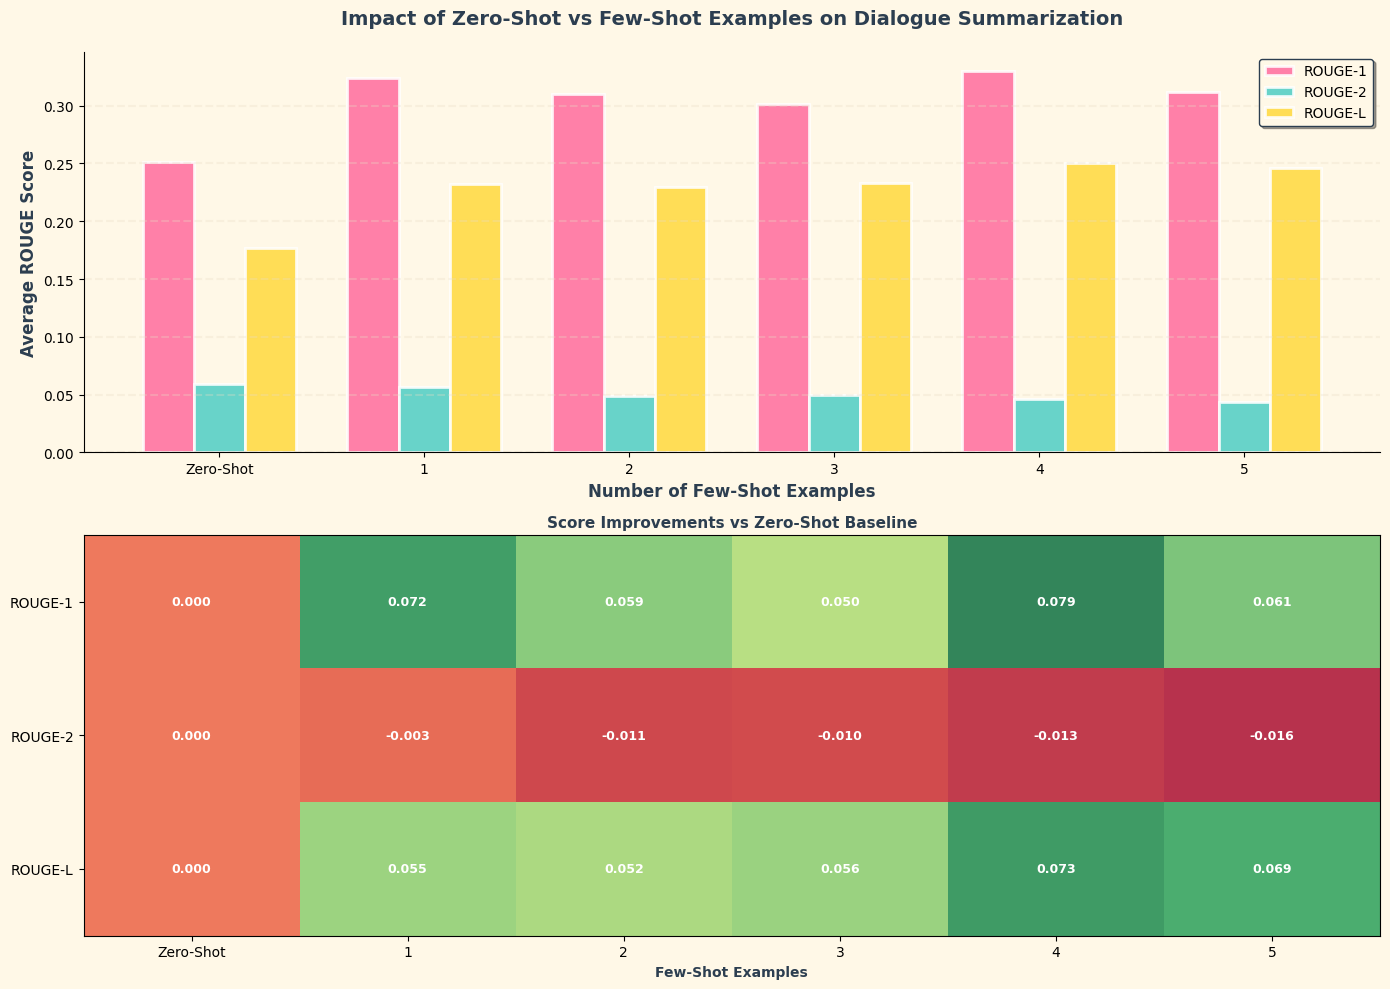


 ROUGE Score Comparison: Zero-Shot vs Few-Shot
  Setting ROUGE-1 ROUGE-2 ROUGE-L
Zero-Shot  0.2511  0.0595  0.1771
   1-Shot  0.3236  0.0570  0.2323
   2-Shot  0.3098  0.0490  0.2294
   3-Shot  0.3012  0.0499  0.2328
   4-Shot  0.3300  0.0460  0.2502
   5-Shot  0.3121  0.0433  0.2458


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

colors = {
    'rouge1': '#FF6B9D',
    'rouge2': '#4ECDC4',
    'rougeL': '#FFD93D',
    'bg': '#FFF8E7',
    'grid': '#E8DCC4',
    'text': '#2C3E50'
}

fig = plt.figure(figsize=(14, 10), facecolor=colors['bg'])

# 1. Main bar chart
ax1 = plt.subplot(2, 1, 1)
ax1.set_facecolor(colors['bg'])

bar_width = 0.25
x_pos = np.arange(len(num_few_shot_examples))

bars1 = ax1.bar(x_pos - bar_width, rouge1_scores, width=bar_width,
                label='ROUGE-1', color=colors['rouge1'], alpha=0.85,
                edgecolor='white', linewidth=2)
bars2 = ax1.bar(x_pos, rouge2_scores, width=bar_width,
                label='ROUGE-2', color=colors['rouge2'], alpha=0.85,
                edgecolor='white', linewidth=2)
bars3 = ax1.bar(x_pos + bar_width, rougeL_scores, width=bar_width,
                label='ROUGE-L', color=colors['rougeL'], alpha=0.85,
                edgecolor='white', linewidth=2)

ax1.set_xlabel("Number of Few-Shot Examples", fontsize=12,
               fontweight='bold', color=colors['text'])
ax1.set_ylabel("Average ROUGE Score", fontsize=12,
               fontweight='bold', color=colors['text'])
ax1.set_title("Impact of Zero-Shot vs Few-Shot Examples on Dialogue Summarization",
              fontsize=14, fontweight='bold', color=colors['text'], pad=20)
ax1.set_xticks(x_pos)
ax1.set_xticklabels(['Zero-Shot'] + [str(x) for x in num_few_shot_examples[1:]], fontsize=10)
ax1.legend(frameon=True, fancybox=True, shadow=True,
           facecolor=colors['bg'], edgecolor=colors['text'])
ax1.grid(axis='y', alpha=0.3, color=colors['grid'], linestyle='--', linewidth=1.5)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

# 2. Improvement heatmap
ax3 = plt.subplot(2, 1, 2)
ax3.set_facecolor(colors['bg'])

improvements = np.array([
    [s - rouge1_scores[0] for s in rouge1_scores],
    [s - rouge2_scores[0] for s in rouge2_scores],
    [s - rougeL_scores[0] for s in rougeL_scores]
])

im = ax3.imshow(improvements, cmap='RdYlGn', aspect='auto', alpha=0.8)
ax3.set_xticks(range(len(num_few_shot_examples)))
ax3.set_xticklabels(['Zero-Shot'] + [str(x) for x in num_few_shot_examples[1:]])
ax3.set_yticks(range(3))
ax3.set_yticklabels(['ROUGE-1', 'ROUGE-2', 'ROUGE-L'])
ax3.set_xlabel("Few-Shot Examples", fontsize=10, fontweight='bold', color=colors['text'])
ax3.set_title("Score Improvements vs Zero-Shot Baseline", fontsize=11,
              fontweight='bold', color=colors['text'])

for i in range(3):
    for j in range(len(num_few_shot_examples)):
        text = ax3.text(j, i, f'{improvements[i, j]:.3f}',
                       ha="center", va="center", color='white',
                       fontweight='bold', fontsize=9)

plt.tight_layout()
plt.show()

What do you notice? Look at [Lost in the Middle: How Language Models Use Long Contexts](https://arxiv.org/abs/2307.03172)

<img src="https://weaviate.io/assets/images/hero-e40b5a3da1ceab43bdc65eddad88807f.jpeg" width=400>

<a name='6'></a>
## 👨‍💻 6 - Parameter-Efficient Fine-tuning with QLoRA and Unsloth

In this section, you will fine-tune Llama3.2-3B-Instruct for dialogue summarization using two different approaches:
- **Supervised Fine-Tuning (SFT)**: Traditional supervised learning with labeled data
- **Group Relative Policy Optimization (GRPO)**: Reinforcement learning approach that optimizes model outputs based on group-wise comparisons

Both approaches will use:
- **QLoRA**: 4-bit quantized LoRA for memory-efficient training
- **Unsloth**: Optimized library for 2x faster training and inference




<p align="center">
<img src="https://thinkingmachines.ai/blog/lora/images/cover-social.png" alt="LoRA without regrets" width="800"/>
</p>


**PEFT** is a form of instruction fine-tuning that is much more efficient than full fine-tuning - with comparable evaluation results as you will see soon. PEFT is a generic term indicating a family of techniques. It includes **Low-Rank Adaptation (LoRA)** and prompt tuning (<u>which is NOT THE SAME as prompt engineering!</u>).


<p align="center">
<img src="https://drive.google.com/uc?export=view&id=1w5BoyVcpkYrXcD_2vczTcQBC8cwTXico" alt="LoRA on Attention Layers" width="1200"/>
</p>

> From ["Evaluating Parameter-Efficient Transfer Learning Approaches on SURE Benchmark for Speech Understanding"](https://arxiv.org/abs/2303.03267).


[**LoRA**](https://arxiv.org/abs/2106.09685) fine-tunes models by **introducing additional low-rank matrices into specific layers** of a pre-trained language model. Instead of updating the entire weight matrix during training, **LoRA injects two small trainable matrices that approximate the weight updates**, while the original weights remain frozen. This setup effectively learns task-specific information through these low-rank updates, while maintaining the integrity of the pre-trained model.

</br>

These lower rank matrices--called **adapters**--flank the pre-trained weight matrices $W$ and lay on their embedded knwoledge for the new domain adaptaion:
$$
\mathbf{W} \in \mathbb{R}^{d \times d} \approx \mathbb{R}^{d \times r} \ni \mathbf{W_A \times W_B} \in \mathbb{R}^{r \times d}
$$
with $r$ being the **rank** which regulates the reduction in number of trainable parameters while preserving the original input and output shapes.

<p align="center">
<img src="https://miro.medium.com/v2/resize:fit:1400/format:webp/1*rOW5plKBuMlGgpD0SO8nZA.png" alt="T5 Fine-Tuning" width="900"/>
</p>


The core idea behind LoRA is **decomposing the weight updates into smaller components**, allowing efficient task-specific adaptation without needing to modify the entire model. This approach significantly reduces the number of parameters that need to be trained.


> You will see this and other efficient training techniques more in details during the course. **Hang on!**


In most cases, when someone says PEFT, they typically mean LoRA. LoRA, at a very high level, **allows the user to fine-tune their model using fewer compute resources (in some cases, a single GPU)**. After fine-tuning for a specific task, use case, or tenant with LoRA, the result is that the original LLM remains unchanged and a newly-trained “LoRA adapter” emerges. **This LoRA adapter is much, much smaller than the original LLM - on the order of a single-digit % of the original LLM size (MBs vs GBs)**.  

</br>

That said, at inference time, the LoRA adapter needs to be reunited and combined with its original LLM to serve the inference request. The benefit, however, is that many LoRA adapters can re-use the original LLM which reduces overall memory requirements when serving multiple tasks and use cases.

> If you’re wondering whether your memory is sufficient for fine-tuning a model, check it out [here](https://huggingface.co/spaces/Vokturz/can-it-run-llm).

<a name='6.1'></a>
### 6.1 - Introduction to QLoRA and Unsloth

Before diving into fine-tuning, let's understand the key technologies that make efficient training possible:

**QLoRA** (Quantized Low-Rank Adaptation) combines quantization with LoRA to enable efficient fine-tuning of large language models:
- Uses **4-bit quantization** to reduce memory footprint by ~75%
- Maintains **LoRA adapters** in higher precision for training quality
- Allows fine-tuning of up to 14B+ parameter models on consumer GPUs
- Achieves performance comparable to full fine-tuning with much less memory

**Unsloth** is an optimized library that provides:
- **2x faster training** than standard implementations through kernel optimizations
- **2x faster inference** for production deployments
- **Memory optimizations** for longer context lengths
- **Seamless integration** with Hugging Face transformers


<p align="left">
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/d6/Hf-logo-with-title.svg/2560px-Hf-logo-with-title.svg.png" alt="hf" width="300">
<img src="https://huggingface.co/datasets/trl-lib/documentation-images/resolve/main/trl_banner_dark.png" alt="trl" width="300">
<img src="https://raw.githubusercontent.com/unslothai/unsloth/main/images/made%20with%20unsloth.png" alt="Unsloth" width="200"/>
</p>

<a name='6.2'></a>
### 6.2 - Supervised Fine-Tuning (SFT)

**Supervised Fine-Tuning (SFT)** is the traditional approach where we train the model on labeled dialogue-summary pairs:

**How it works:**
- The model learns to generate summaries by minimizing the **cross-entropy loss** between predicted and target tokens
- We provide pairs of (input dialogue, target summary) as training examples
- The model adjusts its weights to better predict the target summaries
- This is a **direct optimization** approach - the model learns to mimic the training data

**When to use SFT:**
- You have high-quality labeled data (input-output pairs)
- You want stable, predictable training
- You need a reliable baseline quickly
- Your task is well-defined with clear examples

**Advantages:**
- Simpler to implement and understand
- More stable training process
- Faster convergence
- Good baseline performance

**Limitations:**
- Limited to imitating training examples
- May not generalize well beyond training distribution
- Cannot explore alternative formulations

In [ ]:
import unsloth # <--- important to load unsloth at the beginning


from trl import SFTConfig, SFTTrainer
from transformers import TrainingArguments
from unsloth import is_bfloat16_supported
from unsloth import FastLanguageModel

import torch
from datasets import load_dataset

from evaluate import load
from tqdm import tqdm
import json

rouge = load("rouge")

/tmp/ipython-input-2132138205.py:1: UserWarning: WARNING: Unsloth should be imported before transformers to ensure all optimizations are applied. Your code may run slower or encounter memory issues without these optimizations.

Please restructure your imports with 'import unsloth' at the top of your file.
  import unsloth # <--- important to import load unsloth at the beginning


🦥 Unsloth: Will patch your computer to enable 2x faster free finetuning.
🦥 Unsloth Zoo will now patch everything to make training faster!


In [ ]:
from unsloth import FastLanguageModel
import torch

max_seq_length = 2048
dtype = None  # Auto-detect
load_in_4bit = True

# Load Llama3.2-3B-Instruct with Unsloth optimizations
model, tokenizer = FastLanguageModel.from_pretrained(
    model_name = "meta-llama/Llama-3.2-3B-Instruct",
    max_seq_length = max_seq_length,
    dtype = dtype,
    load_in_4bit = load_in_4bit,
)

print(f"Model loaded: {model.config.model_type}")
print(f"Vocab size: {len(tokenizer)}")

==((====))==  Unsloth 2025.10.1: Fast Llama patching. Transformers: 4.56.2.
   \\   /|    Tesla T4. Num GPUs = 1. Max memory: 14.741 GB. Platform: Linux.
O^O/ \_/ \    Torch: 2.8.0+cu126. CUDA: 7.5. CUDA Toolkit: 12.6. Triton: 3.4.0
\        /    Bfloat16 = FALSE. FA [Xformers = 0.0.32.post2. FA2 = False]
 "-____-"     Free license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!
Model loaded: llama
Vocab size: 128256


We also define a util function to perform parallel generation using batches. For our tests we shall use a simple and direct instruction prompt.

In [ ]:
SYSTEM_PROMPT = """
You are a helpful assistant. Your task is to summarize the texts provided by the user.
Answer directly with no prehamble or comment.
Be precise and concise.
"""


def generate_outputs_in_batches(model,
                                tokenizer,
                                dataset,
                                batch_size : int = 16,
                                max_length : int = 512,
                                max_new_tokens : int = 256,
                                device : str = "cuda"):

    # Enable native 2x faster inference
    FastLanguageModel.for_inference(model)
    texts = dataset["dialogue"]

    # Calculate the number of batches
    num_batches = (len(texts) + batch_size - 1) // batch_size

    generated_outputs = []
    for i in tqdm(range(num_batches)):
        this_batch = texts[i * batch_size:(i + 1) * batch_size]

        # prompt the data into a conversation-like input
        batch_texts = []
        for txt in this_batch:
          msg = [
              {
                  "role" : "system",
                  "content" : SYSTEM_PROMPT
              },
              {
                  "role" : "user",
                  "content" : txt
              }
          ]
          msg_prompted = tokenizer.apply_chat_template(msg, tokenize=False, add_generation_prompt=True)
          batch_texts.append(msg_prompted)

        inputs = tokenizer(batch_texts,
                           padding=True,
                           return_tensors="pt",
                           max_length=max_length,
                           truncation=True).to(device)

        # Let's use greedy decoding
        outputs = model.generate(
            **inputs,
            max_new_tokens=max_new_tokens,
            do_sample=True,
            temperature=0.2,
            use_cache=True
        )

        # Decode the generated outputs into human-readable text
        decoded_outputs = tokenizer.batch_decode(outputs, skip_special_tokens=True)

        # post-process outputs to remove special tokens
        parsed_dec_outs = []
        for out in decoded_outputs:
          parsed_dec_outs.append(out.split("assistant")[-1].strip())

        generated_outputs.extend(parsed_dec_outs)

    return generated_outputs

Let's download (again) the `dialogsum` dataset and format it.

In [ ]:
from datasets import load_dataset
huggingface_dataset_name = "knkarthick/dialogsum"

dataset = load_dataset(huggingface_dataset_name)

dataset

DatasetDict({
    train: Dataset({
        features: ['id', 'dialogue', 'summary', 'topic'],
        num_rows: 12460
    })
    validation: Dataset({
        features: ['id', 'dialogue', 'summary', 'topic'],
        num_rows: 500
    })
    test: Dataset({
        features: ['id', 'dialogue', 'summary', 'topic'],
        num_rows: 1500
    })
})

Now we can load the model.

**Why using and fine-tuning an Instruct model?**

Instruct models, which undergo instruction tuning phases, offer distinct advantages for specific tasks. While base models, if fine-tuned, can lead to better results due to their greater flexibility, <mark>instruction-tuned models excel at following instructions out of the box</mark>. This makes them particularly suitable for controllable tasks like controllable summarization, where precise adherence to guidelines is crucial.

For short training sessions focused on formatting writing styles rather than injecting new knowledge, using an instruction-tuned model can be the optimal choice.

> ⚠️ **WARNING**: Beware of catastrophic forgetting!

Instruction-tuned models are fine-tuned to follow a specific input template that clearly define the system prompt, the user query and the model's answer. This is particularly useful for conversatioanl agents to define the roles in the chat history.

Also for "one-shot" instruction dialogues, we must follow such formalism to elicit the model's capabilities and fully exploit its potentialities.

In [ ]:
msgs = [
    {
        "role" : "system",
        "content" : "You are a helpful assistant. Your task is to answer the user's questions precisely."
    },
    {
        "role" : "user",
        "content" : "If a brick weights 1 kilo plus half a kilo, how much does a brick weigh?"
    },
    {
        "role" : "assistant",
        "assistant" : "eh, nice question. Gpt-4o doesn't know, how am I supposed to?!"
    }
]

chat_msgs = tokenizer.apply_chat_template(msgs, tokenize=False, add_generation_prompt=False)
print(chat_msgs)

<|begin_of_text|><|start_header_id|>system<|end_header_id|>

Cutting Knowledge Date: December 2023
Today Date: 15 Oct 2025

You are a helpful assistant. Your task is to answer the user's questions precisely.<|eot_id|><|start_header_id|>user<|end_header_id|>

If a brick weights 1 kilo plus half a kilo, how much does a brick weigh?<|eot_id|><|start_header_id|>assistant<|end_header_id|>

<|eot_id|>


Roles are delimited by some special tags. <mark>Each instruction-tuned LLM has its owns</mark>.

We (obviously) don’t have the model’s answer for open generation, so we need to leave the assistant field out of the input. However, we must remember to append the assistant tag at the end so that the model can begin generating correctly starting from there.

In [ ]:
msgs = [
    {
        "role" : "system",
        "content" : "You are a helpful assistant. Your task is to answer the user's questions precisely."
    },
    {
        "role" : "user",
        "content" : "If a brick weights 1 kilo plus half a kilo, how much does a brick weigh?"
    },
]
chat_msgs = tokenizer.apply_chat_template(msgs, tokenize=False, add_generation_prompt=True)
print(chat_msgs)

<|begin_of_text|><|start_header_id|>system<|end_header_id|>

Cutting Knowledge Date: December 2023
Today Date: 15 Oct 2025

You are a helpful assistant. Your task is to answer the user's questions precisely.<|eot_id|><|start_header_id|>user<|end_header_id|>

If a brick weights 1 kilo plus half a kilo, how much does a brick weigh?<|eot_id|><|start_header_id|>assistant<|end_header_id|>




Let's now evaluate the performances of the base model on a small test sample.

In [ ]:
test_dataset = dataset["test"].select(range(20))

In [ ]:
gen_configs = {
    "model" : model,
    "tokenizer" : tokenizer,
    "dataset" : test_dataset,
    "batch_size" : 8,
    "max_new_tokens" : 64
}

original_model_summaries = generate_outputs_in_batches(**gen_configs)

100%|██████████| 3/3 [00:25<00:00,  8.45s/it]


In [ ]:
reference_txt = test_dataset["dialogue"][0]
print(reference_txt)

#Person1#: Ms. Dawson, I need you to take a dictation for me.
#Person2#: Yes, sir...
#Person1#: This should go out as an intra-office memorandum to all employees by this afternoon. Are you ready?
#Person2#: Yes, sir. Go ahead.
#Person1#: Attention all staff... Effective immediately, all office communications are restricted to email correspondence and official memos. The use of Instant Message programs by employees during working hours is strictly prohibited.
#Person2#: Sir, does this apply to intra-office communications only? Or will it also restrict external communications?
#Person1#: It should apply to all communications, not only in this office between employees, but also any outside communications.
#Person2#: But sir, many employees use Instant Messaging to communicate with their clients.
#Person1#: They will just have to change their communication methods. I don't want any - one using Instant Messaging in this office. It wastes too much time! Now, please continue with the memo. Wh

In [ ]:
print("GOLD Summary")
print(test_dataset["summary"][0])

print("Generated Summary")
print(original_model_summaries[0])

GOLD Summary
Ms. Dawson helps #Person1# to write a memo to inform every employee that they have to change the communication method and should not use Instant Messaging anymore.
Generated Summary
Attention all staff: Effective immediately, all office communications are restricted to email correspondence and official memos. The use of Instant Message programs by employees during working hours is strictly prohibited. This policy applies to all internal and external communications. Any employee who persists in using Instant Messaging will first receive a warning and be placed on probation.


In [ ]:
original_model_results = rouge.compute(
    predictions=original_model_summaries,
    references=test_dataset["summary"],
    use_aggregator=True,
    use_stemmer=True,
)
print(f"ORIGINAL MODEL STATS:")
print(json.dumps(original_model_results,indent=2))

ORIGINAL MODEL STATS:
{
  "rouge1": 0.20326069860248552,
  "rouge2": 0.07715627258919941,
  "rougeL": 0.1425271718930105,
  "rougeLsum": 0.14303287146944987
}


Results show how LLMs have already optimal performances in zero-shot contexts. However, without proper prompt tuning to align the model, generations may be “too good”. LLMs are fine-tuned to satisfy users in terms of clarity and exhaustiveness. These features may, though, interfere with the dataset's style requirements. The take-home message is:
> LLMs are no magic potion! We have to learn how to deal with them.


The **goal of the training** is not teaching the model to acquire the ability to formulate summaries but rather to **align it to a specif format**.

We can now set the training configurations for LoRA.

In [ ]:
# >> Training arguments
SEED = 42

# > LoRA
R = 16
ALPHA = 16
LORA_DROPOUT = 0

# Train all linear layers in the attention modules
TARGET_LAYERS = ["q_proj", "k_proj", "v_proj", "o_proj", "gate_proj", "up_proj", "down_proj"]

In [ ]:
# Add LoRA adapters with Unsloth
model = FastLanguageModel.get_peft_model(
    model,
    r = R,
    target_modules = TARGET_LAYERS,
    lora_alpha = ALPHA,
    lora_dropout = LORA_DROPOUT,            # Supports any, but = 0 is optimized
    bias = "none",                          # Supports any, but = "none" is optimized
    use_gradient_checkpointing = "unsloth", # for efficiency in gradient backpropagation (uses 30% less VRAM, fits 2x larger batch sizes)
    random_state = SEED,
    use_rslora = False,                     # enable rank stabilized LoRA
    loftq_config = None,                    # And LoftQ
)


# Print trainable parameters
trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
all_params = sum(p.numel() for p in model.parameters())
print(f"Trainable parameters: {trainable_params:,}")
print(f"All parameters: {all_params:,}")
print(f"Percentage trainable: {100 * trainable_params / all_params:.2f}%")

Trainable parameters: 24,313,856
All parameters: 1,865,526,272
Percentage trainable: 1.30%


As <mark>we are not interested in fine-tuning the model on the whole text but on the target summary only</mark>, we can define a data construct that masks the input up to the start of the text to be generated.

In doing so, the model will only learn to generate a summary based on a query. This may seem counterintuitive, but sometimes we want to fine-tune the model using the entire input text. For example, training the model to predict the next token in the question based on the previous ones (this goes under the name of _Continual Pre-Training_).

Let's define a dataset preprocessing pipeline.

In [ ]:
from datasets import DatasetDict

def parse_completion_dataset(example : dict) -> str:
    """
    Combine and prompt data instances by merging the original text and the target summary using a simple prompt.
    """

    SYS_PROMPT = """You are a helpful assistant. Your task is to summarize the texts provided by the user.
Answer directly with no prehamble or comment.
"""

    messages = [
        {
            "role" : "system",
            "content" : SYS_PROMPT
        },
        {
            "role" : "user",
            "content" : example["dialogue"]
        },
        {
            "role" : "assistant",
            "content" : example["summary"]
        }
    ]

    return {"text" : tokenizer.apply_chat_template(messages, tokenize=False)}

cols = dataset.column_names

compeltion_ds = DatasetDict({
    split : dataset[split].map(parse_completion_dataset, remove_columns=cols[split])
    for split in dataset
})

compeltion_ds

Map:   0%|          | 0/12460 [00:00<?, ? examples/s]

Map:   0%|          | 0/500 [00:00<?, ? examples/s]

Map:   0%|          | 0/1500 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['text'],
        num_rows: 12460
    })
    validation: Dataset({
        features: ['text'],
        num_rows: 500
    })
    test: Dataset({
        features: ['text'],
        num_rows: 1500
    })
})

<a name="6.2.1"></a>
#### 6.2.1 Unsloth Training



In [ ]:
# > Training Config
LR = 2e-4
TRAIN_BS=2
EVAL_BS=4
GRAD_ACC_STEPS=4
WARMUP_STEPS=5
WEIGHT_DECAY=0.01

MAX_STEPS=50

In [ ]:
trainer = SFTTrainer(
    model = model,
    tokenizer = tokenizer,
    train_dataset = compeltion_ds["train"],
    eval_dataset = compeltion_ds["validation"],
    args = SFTConfig(
        per_device_train_batch_size = TRAIN_BS,
        per_device_eval_batch_size = EVAL_BS,
        gradient_accumulation_steps = GRAD_ACC_STEPS,
        warmup_steps = WARMUP_STEPS,
        max_steps = MAX_STEPS,
        learning_rate = LR,
        fp16 = not is_bfloat16_supported(),
        bf16 = is_bfloat16_supported(),
        logging_steps = 1,
        optim = "adamw_8bit",
        weight_decay = WEIGHT_DECAY,
        lr_scheduler_type = "linear",
        seed = SEED,
        output_dir = "outputs",
        report_to = "none", # Use this for WandB
    ),
)

Unsloth: Tokenizing ["text"] (num_proc=6):   0%|          | 0/12460 [00:00<?, ? examples/s]

Unsloth: Tokenizing ["text"] (num_proc=6):   0%|          | 0/500 [00:00<?, ? examples/s]

In [ ]:
from unsloth.chat_templates import train_on_responses_only

# define the specific template to help data segmentation
llama_completion_kwargs = dict(
    instruction_part = "<|start_header_id|>user<|end_header_id|>",
    response_part="<|start_header_id|>assistant<|end_header_id|>")

In [ ]:
trainer = train_on_responses_only(
    trainer,
    **llama_completion_kwargs,
)

Map (num_proc=2):   0%|          | 0/12460 [00:00<?, ? examples/s]

Map (num_proc=2):   0%|          | 0/500 [00:00<?, ? examples/s]

In [ ]:
# Start training

trainer_stats = trainer.train()

==((====))==  Unsloth - 2x faster free finetuning | Num GPUs used = 1
   \\   /|    Num examples = 12,460 | Num Epochs = 1 | Total steps = 50
O^O/ \_/ \    Batch size per device = 2 | Gradient accumulation steps = 4
\        /    Data Parallel GPUs = 1 | Total batch size (2 x 4 x 1) = 8
 "-____-"     Trainable parameters = 24,313,856 of 3,237,063,680 (0.75% trained)


Unsloth: Will smartly offload gradients to save VRAM!


Step,Training Loss
1,1.868700
2,1.748100
3,2.115600
4,1.381000
5,1.473000
6,1.548200
7,1.439700
8,1.443100
9,1.418200
10,1.373800


In [ ]:
gen_configs = {
    "model" : model,
    "tokenizer" : tokenizer,
    "dataset" : test_dataset,
    "batch_size" : 8,
    "max_new_tokens" : 50
}

instruct_model_summaries = generate_outputs_in_batches(**gen_configs)

instruct_model_results = rouge.compute(
    predictions=instruct_model_summaries,
    references=test_dataset["summary"],
    use_aggregator=True,
    use_stemmer=True,
)

print(f"INSTRUCT MODEL STATS:")
print(json.dumps(instruct_model_results,indent=2))

INSTRUCT MODEL STATS:
{
  "rouge1": 0.3015122447242398,
  "rouge2": 0.08816493053112773,
  "rougeL": 0.25449962657609415,
  "rougeLsum": 0.2544490136588362
}


In [ ]:
print("GOLD Summary")
print(test_dataset["summary"][0])

print("Generated Summary")
print(instruct_model_summaries[0])

GOLD Summary
Ms. Dawson helps #Person1# to write a memo to inform every employee that they have to change the communication method and should not use Instant Messaging anymore.
Generated Summary
#Person1# asks Ms. Dawson to take dictation for an intra-office memo. #Person1# explains that all office communications are restricted to email and official memos, and employees who use Instant Messaging will be warned and placed on probation.


Notice how a short fine-tuning with little data and low computational resources can significantly impact the model's performance.

<a name='6.3'></a>
### 6.3 - Group Relative Policy Optimization (GRPO) and Its Variants

While Supervised Fine-Tuning (SFT) directly learns from labeled examples, **Group Relative Policy Optimization (GRPO)** is a reinforcement learning-based approach that optimizes the model based on relative preferences within groups of responses.

**Key differences from SFT:**
- **SFT**: Learns to mimic exact reference summaries through supervised learning
- **GRPO**: Learns to generate better summaries by comparing multiple candidates and optimizing for quality metrics through reinforcement learning

---

#### What is GRPO?

**Group Relative Policy Optimization** is a reinforcement learning algorithm designed for training large language models, introduced in the paper [*DeepSeekMath: Pushing the Limits of Mathematical Reasoning in Open Language Models*](https://huggingface.co/papers/2402.03300) (2024).

GRPO is a variant of Proximal Policy Optimization (PPO) that enhances mathematical reasoning capabilities while optimizing memory usage. The key innovation is its **group-relative advantage calculation**, which normalizes rewards across multiple completions generated for the same prompt, aligning with the comparative nature of reward models.

**Why GRPO over PPO?** GRPO removes the dependency on the value model, which becomes inaccurate for long text outputs and complex tasks. This makes GRPO more scalable and efficient.

---

#### How GRPO Works

GRPO is an **online learning algorithm** that improves iteratively through four main steps:

##### 1. **Generating Completions**
For each prompt $x$, the model generates $K$ different completions: $\{y_1, y_2, \ldots, y_K\}$

##### 2. **Computing the Advantage**
The advantage for each completion is calculated using group normalization:

$$\hat{A_i} = \frac{r_i - \text{mean}(r)}{\text{std}(r)}$$

where $r_i$ is the reward for completion $i$, and the mean and standard deviation are computed across all $K$ completions for the same prompt.

> **Note:** The original formulation includes division by $\text{std}(r)$, but recent research suggests that disabling this scaling (by setting `scale_rewards=False`) can reduce question-level difficulty bias.

##### 3. **Estimating KL Divergence**
KL divergence between the current policy $\pi_\theta$ and reference policy $\pi_{\text{ref}}$ is estimated to prevent the model from deviating too far from the reference.

##### 4. **Computing the Loss**
The GRPO objective maximizes the advantage while constraining the policy update using a clipped surrogate objective:

$$
ℒ_{\text{GRPO}}(\theta) = -\mathbb{E} \left[ \min \left( r_t(\theta)\hat{A_~}, \text{clip}(r_t(\theta), 1-\epsilon, 1+\epsilon) \hat{A_~} \right) \right] + \beta \cdot D_{\text{KL}}(\pi_\theta || \pi_{\text{ref}})
$$

where:
- $r_t(\theta) = \frac{\pi_\theta(y_t|x, y_{<t})}{\pi_{\text{ref}}(y_t|x, y_{<t})}$ is the **importance sampling ratio** (token-level)
- $\epsilon$ is the clipping parameter (typically 0.2)
- $\beta$ is the KL coefficient (often set to 0 in practice)

**The Role of Importance Sampling:** The ratio $r_t(\theta)$ allows us to evaluate the new policy using data from the old policy, avoiding expensive resampling. However, if the gap between policies is too large, this ratio can have high variance, leading to instability.

![GRPO Visual](https://huggingface.co/datasets/trl-lib/documentation-images/resolve/main/grpo_visual.png)

---

#### GRPO's Limitations

While GRPO improves upon PPO, it has several key limitations that motivated further research:

1. **Response-Level Length Bias**: Longer responses are under-penalized in the original formulation
2. **Inefficient Sampling**: When all samples have similar rewards (all good or all bad), gradient contributions become zero
3. **Token Gradient Dilution**: In long sequences, individual token gradients get diluted
4. **High Variance in MoE Architectures**: Token-level importance sampling creates instability, especially with Mixture-of-Experts models
5. **Granularity Mismatch**: Rewards are given at the sequence level, but optimization happens token-by-token

These limitations led to three important variants: **DAPO**, **dr. GRPO**, and **GSPO**.

---

<mark>Variant 1: DAPO (Token-Level Normalization)</mark>

The [**DAPO paper**](https://huggingface.co/papers/2503.14476) (*DAPO: An Open-Source LLM Reinforcement Learning System at Scale*) introduced four key improvements to address GRPO's efficiency and stability issues.

#### **DAPO Improvement #1: Clip-Higher**

**The Problem:** GRPO's symmetric clipping range $[1-\epsilon, 1+\epsilon]$ causes "good tokens being capped too early." When the old policy assigns very low probability to a good token (positive advantage), the current policy has little room to increase its probability before being clipped.

**Example:** If the old policy probability is 0.2 and $\epsilon=0.2$, the upper bound is $0.2 \times 1.2 = 0.24$. Even if the current policy increases it to 0.4 (a good improvement!), it gets clipped.

**The Solution:** DAPO raises the upper clipping bound while keeping the lower bound fixed, giving the model more room to reinforce good tokens that were previously unlikely.

---

#### **DAPO Improvement #2: Dynamic Sampling**

**The Problem:** When all sampled responses have the same reward (all 0 or all 1), they all receive zero advantage after normalization, contributing zero gradient. This wastes computation and increases variance.

**The Solution:** Enforce that for each query, the sampled responses must contain both correct and incorrect answers:

$$\exists i, j: r_i \neq r_j$$

If all samples have identical rewards, continue sampling until diversity is achieved.

---

#### **DAPO Improvement #3: Token-Level Gradient Loss**

**The Problem:** The original GRPO normalizes loss by individual sequence length:

$$ℒ_{\text{GRPO-original}}(\theta) = -\frac{1}{|y|}\sum_{t=1}^{|y|}\min(r_t(\theta) \hat{A_~} , \text{clip}(r_t(\theta), 1-\epsilon, 1+\epsilon)\hat{A_~})$$

This causes longer responses to be under-penalized. A 200-token response gives each token weight $\frac{1}{200}$, while a 10-token response gives each token weight $\frac{1}{10}$, making shorter responses dominate the gradient.

**The Solution:** DAPO proposes **token-level normalization** across the entire batch:

$$ℒ_{\text{DAPO}}(\theta) = -\frac{1}{\sum_i |y_i|}\sum_{i}\sum_{t=1}^{|y_i|}\min(r_t^{(i)}(\theta)\hat{A_~}_i, \text{clip}(r_t^{(i)}(\theta), 1-\epsilon, 1+\epsilon)\hat{A_~}_i)$$

This treats all tokens equally regardless of response length, preventing gradient signals from being diluted in long, high-quality responses.

---

#### **DAPO Improvement #4: Overlong Reward Shaping**

**The Problem:** Overly long responses can receive high rewards even when they contain unnecessary verbosity or repetition.

**The Solution:** Apply a soft penalty to tokens once the sequence exceeds a predefined length threshold. The penalty increases linearly, and if a second threshold is exceeded, the penalty can cancel out the original reward entirely.

**Usage in TRL:** Set `loss_type="bnpo"` (default in the current implementation)

---

<mark>Variant 2: dr. GRPO (Constant Normalization)</mark>

The [**dr. GRPO paper**](https://huggingface.co/papers/2503.20783) (*Understanding R1-Zero-Like Training: A Critical Perspective*) demonstrated that while DAPO reduces length bias, it doesn't eliminate it completely.

#### The Solution: Constant Normalization

dr. GRPO proposes dividing by a **fixed constant** instead of sequence length:

$$ℒ_{\text{dr. GRPO}}(\theta) = -\frac{1}{C}\sum_{i}\sum_{t=1}^{|y_i|}\min(r_t^{(i)}(\theta)\hat{A_~}_i, \text{clip}(r_t^{(i)}(\theta), 1-\epsilon, 1+\epsilon)\hat{A_~}_i)$$

where $C$ is a constant, recommended to be set to the **maximum completion length** (`max_completion_length`).

#### Key Advantage

This formulation **completely eliminates response-level length bias**, providing more stable training dynamics and fairer treatment of completions regardless of their length.

**Usage in TRL:** Set `loss_type="dr_grpo"`

---

<mark>Variant 3: GSPO (Sequence-Level Optimization)</mark>

**Group Sequential Policy Optimization (GSPO)** represents a fundamental shift from token-level to sequence-level optimization. Developed by the Qwen team and published in their paper "Group Sequence Policy Optimization" (July 2025), GSPO was used to train the latest Qwen3 models (Instruct, Coder, Thinking) (Aug 2025), demonstrating superior stability, efficiency, and performance compared to GRPO. GSPO addresses GRPO's core structural issues, particularly in Mixture-of-Experts (MoE) architectures.

#### The Core Problem with Token-Level Optimization

**Granularity Mismatch:** We evaluate models based on full responses (sequence-level rewards), but train them token-by-token. This creates:
- High variance from per-token importance sampling
- Noise accumulation in long sequences
- Instability in MoE models where different experts activate between old and new policies

**Why This Matters for MoE:** In MoE architectures, the routing to different experts can change dramatically between the old policy (used for sampling) and the new policy (being trained). This creates unpredictable, high-variance fluctuations in token probabilities that distort gradient estimates.

---

#### GSPO's Solution: Sequence-Level Importance Ratios

Instead of computing importance ratios per-token, GSPO uses a single ratio for the entire sequence:

$$r_{\text{seq}}(\theta) = \exp\left(\frac{1}{|y|}\sum_{t=1}^{|y|} \log \frac{\pi_\theta(y_t|x, y_{<t})}{\pi_{\text{ref}}(y_t|x, y_{<t})}\right)$$

This is the **length-normalized** sequence-level importance ratio, computed as:
1. Calculate log-probability difference for each token
2. Average across all tokens (normalization)
3. Exponentiate to get the probability ratio

**Why normalize by length?** Without normalization, longer sequences would have extreme ratio values, making training unstable. Normalization keeps ratios on a consistent scale regardless of sequence length.

**Why exponentiate?** Importance sampling requires probability ratios, not log-probability differences. Using log differences directly would break the unbiased correction property of importance sampling.

---

#### GSPO Loss Function

The GSPO objective replaces token-level ratios with sequence-level ratios:

$$ℒ_{\text{GSPO}}(\theta) = -\mathbb{E}\left[\min(r_{\text{seq}}(\theta)\hat{A_~}, \text{clip}(r_{\text{seq}}(\theta), 1-\epsilon, 1+\epsilon)\hat{A_~})\right]$$

**Key difference:** All tokens in a sequence now share the same importance ratio $r_{\text{seq}}(\theta)$, ensuring **intra-sequence gradient consistency**.

---

#### Benefits of GSPO

1. **Eliminates Token-Level Variance**: All tokens in a response get the same weight, reducing noise
2. **Stability in MoE Training**: No longer needs "Routing Replay" (recording and forcing expert activations to match between sampling and training)
3. **Aligned Optimization**: Matches the sequence-level nature of the reward signal
4. **Higher Efficiency**: More aggressive clipping filters low-quality samples, using fewer tokens but achieving better results
5. **Prevents Sudden Collapse**: Reduces the risk of training instability that can cause unrecoverable model degradation

---

#### GSPO vs. GRPO: Gradient Comparison

**GRPO Gradient (without clipping):**
$$\nabla_\theta ℒ_{\text{GRPO}} = -\mathbb{E}\left[\sum_{t=1}^{|y|} r_t(\theta) \hat{A_~} \nabla_\theta \log \pi_\theta(y_t|x, y_{<t})\right]$$

Each token has its own weight $r_t(\theta)$, which varies by position and context.

**GSPO Gradient (without clipping):**
$$\nabla_\theta ℒ_{\text{GSPO}} = -\mathbb{E}\left[r_{\text{seq}}(\theta) \hat{A_~} \sum_{t=1}^{|y|} \nabla_\theta \log \pi_\theta(y_t|x, y_{<t})\right]$$

All tokens share the same weight $r_{\text{seq}}(\theta)$, ensuring consistent gradient magnitude across the sequence.

---

#### Summary Comparison

| Method | Normalization | Optimization Level | Length Bias | MoE Stability | Configuration |
|--------|---------------|-------------------|-------------|---------------|---------------|
| **Original GRPO** | By sequence length $\|y\|$ | Token-level | ✗ High | ✗ Poor | `loss_type="grpo"` |
| **DAPO** | By total batch tokens $\sum_i \|y_i\|$ | Token-level | △ Reduced | △ Improved | `loss_type="bnpo"` (default) |
| **dr. GRPO** | By constant $C$ | Token-level | ✓ Eliminated | △ Improved | `loss_type="dr_grpo"` |
| **GSPO** | Length-normalized sequence | Sequence-level | ✓ Eliminated | ✓ Excellent | `importance_sampling_level="sequence"` |

---

#### The Evolution: From PPO → GRPO → DAPO → GSPO

1. **PPO**: Uses value model; struggles with long text due to inaccurate value estimates
2. **GRPO**: Removes value model dependency; more scalable but has length bias and variance issues
3. **DAPO**: Refines GRPO with better clipping, sampling, and gradient computation; still token-level
4. **GSPO**: Fundamental shift to sequence-level optimization; aligns reward granularity with training objective

**Key Insight:** Progress in RL for LLMs comes from aligning the optimization approach with the nature of the task while keeping training simple, scalable, and stable.

---

#### Implementation Details

All variants (GRPO, DAPO, dr. GRPO, and GSPO) are implemented in the **Hugging Face TRL library**.

**Configuration Examples:**

```python
from trl import GRPOConfig

# Original GRPO (token-level)
training_args = GRPOConfig(
    loss_type="grpo",
    epsilon=0.2,
    beta=0.0
)

# DAPO (default, token-level with batch normalization)
training_args = GRPOConfig(
    loss_type="bnpo",  # Default
    epsilon=0.2,
    beta=0.0
)

# dr. GRPO (token-level with constant normalization)
training_args = GRPOConfig(
    loss_type="dr_grpo",
    epsilon=0.2,
    beta=0.0,
    max_completion_length=512  # Used as normalization constant
)

# GSPO (sequence-level optimization)
training_args = GRPOConfig(
    importance_sampling_level="sequence",  # Key parameter for GSPO
    loss_type="grpo",
    epsilon=3e-4,        # Lower epsilon for sequence-level
    epsilon_high=4e-4,   # Asymmetric clipping (Clip-Higher)
    beta=0.0
)
```

**Key Parameters Explained:**

- **`importance_sampling_level`**: Set to `"sequence"` for GSPO (sequence-level), default is `"token"` for token-level methods
- **`loss_type`**: Choose `"grpo"`, `"bnpo"` (DAPO, default), or `"dr_grpo"`
- **`epsilon`**: Lower clipping bound (typically 0.2 for token-level, 3e-4 for GSPO)
- **`epsilon_high`**: Upper clipping bound for Clip-Higher (DAPO/GSPO feature). If not set, uses symmetric clipping
- **`beta`**: KL divergence coefficient (often set to 0.0 in practice)
- **`max_completion_length`**: Used as normalization constant $C$ in dr. GRPO

**Choosing the Right Variant:**

- **Use DAPO (bnpo)** for general-purpose training with improved stability over original GRPO
- **Use dr. GRPO** when you want to completely eliminate length bias in token-level optimization
- **Use GSPO** for:
  - Training with MoE architectures (most stable)
  - Long-sequence generation tasks
  - When you want to avoid Routing Replay complexity
  - Following state-of-the-art approaches (used in Qwen3)

For comprehensive implementation details, training examples, and advanced configurations, refer to:

**📚 [TRL GRPO Trainer Documentation](https://huggingface.co/docs/trl/main/en/grpo_trainer)**

**📖 [From GRPO to DAPO and GSPO: What, Why, and How](https://huggingface.co/blog/NormalUhr/grpo-to-dapo-and-gspo)**

**📖 [From GRPO to DAPO and GSPO: What, Why, and How](https://huggingface.co/blog/NormalUhr/grpo-to-dapo-and-gspo)**

**📄 [GSPO Paper: Group Sequence Policy Optimization (arXiv:2507.18071)](https://arxiv.org/abs/2507.18071)**

Let's implement GRPO training for our Llama3.2-3B-Instruct model.

<a name='6.3.1'></a>
#### 6.3.1 - Setup for GRPO

In [ ]:
# Load necessary libraries for GRPO
import unsloth

from trl import GRPOConfig, GRPOTrainer
from transformers import TrainingArguments,GenerationConfig
from unsloth import is_bfloat16_supported
from unsloth import FastLanguageModel

import torch
from datasets import load_dataset

from evaluate import load
from tqdm import tqdm
import json

rouge = load("rouge")

print("GRPO libraries loaded successfully!")

/tmp/ipython-input-2194191536.py:2: UserWarning: WARNING: Unsloth should be imported before transformers to ensure all optimizations are applied. Your code may run slower or encounter memory issues without these optimizations.

Please restructure your imports with 'import unsloth' at the top of your file.
  import unsloth


🦥 Unsloth: Will patch your computer to enable 2x faster free finetuning.
🦥 Unsloth Zoo will now patch everything to make training faster!


GRPO libraries loaded successfully!


<a name='6.3.2'></a>
#### 6.3.2 - Load Model for GRPO Training

For GRPO, we'll load a fresh instance of Llama3.2-3B-Instruct with the same configuration as we used for SFT.

In [ ]:
# Load model for GRPO training
MAX_SEQ_LENGTH = 2048
SEED = 42

grpo_model, grpo_tokenizer = FastLanguageModel.from_pretrained(
    model_name="meta-llama/Llama-3.2-3B-Instruct",
    max_seq_length=MAX_SEQ_LENGTH,
    dtype=None,
    load_in_4bit=True,
)

# Apply LoRA adapters
grpo_model = FastLanguageModel.get_peft_model(
    grpo_model,
    r=16,
    target_modules=["q_proj", "k_proj", "v_proj", "o_proj", "gate_proj", "up_proj", "down_proj"],
    lora_alpha=16,
    lora_dropout=0,
    bias="none",
    use_gradient_checkpointing="unsloth",
    random_state=SEED,
)

print("GRPO model loaded with LoRA adapters")

==((====))==  Unsloth 2025.10.1: Fast Llama patching. Transformers: 4.56.2.
   \\   /|    Tesla T4. Num GPUs = 1. Max memory: 14.741 GB. Platform: Linux.
O^O/ \_/ \    Torch: 2.8.0+cu126. CUDA: 7.5. CUDA Toolkit: 12.6. Triton: 3.4.0
\        /    Bfloat16 = FALSE. FA [Xformers = 0.0.32.post2. FA2 = False]
 "-____-"     Free license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!


model.safetensors:   0%|          | 0.00/2.35G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/234 [00:00<?, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/454 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.2M [00:00<?, ?B/s]

chat_template.jinja: 0.00B [00:00, ?B/s]

Unsloth 2025.10.1 patched 28 layers with 28 QKV layers, 28 O layers and 28 MLP layers.


GRPO model loaded with LoRA adapters


<a name='6.3.3'></a>
#### 6.3.3 - Prepare Dataset for GRPO

For GRPO, we need to format the data differently than SFT. GRPO requires prompts (queries) that the model will generate responses for, which will then be evaluated and compared.

In [ ]:
# if not done before, load the dataset
from datasets import load_dataset
huggingface_dataset_name = "knkarthick/dialogsum"

dataset = load_dataset(huggingface_dataset_name)

dataset

README.md: 0.00B [00:00, ?B/s]

train.csv:   0%|          | 0.00/11.3M [00:00<?, ?B/s]

validation.csv: 0.00B [00:00, ?B/s]

test.csv: 0.00B [00:00, ?B/s]

Generating train split:   0%|          | 0/12460 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/500 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1500 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['id', 'dialogue', 'summary', 'topic'],
        num_rows: 12460
    })
    validation: Dataset({
        features: ['id', 'dialogue', 'summary', 'topic'],
        num_rows: 500
    })
    test: Dataset({
        features: ['id', 'dialogue', 'summary', 'topic'],
        num_rows: 1500
    })
})

In [ ]:
def prepare_grpo_dataset(example):
    """
    Prepare dataset for GRPO training.
    GRPO needs prompts (queries) and reference completions for reward calculation.
    """
    msg = [
        {
            "role": "system",
            "content": "You are a helpful assistant. Your task is to summarize the texts provided by the user."
        },
        {
            "role": "user",
            "content": example["dialogue"]
        }
    ]

    answ_ref = [
        {
            "role" : "assistant",
            "content" : example["summary"]
        }
    ]

    return {
        "prompt": msg,
        "reference": example["summary"]  # Gold standard for reward calculation
    }

# Prepare GRPO dataset
grpo_dataset = dataset["train"].map(prepare_grpo_dataset, remove_columns=dataset["train"].column_names)
grpo_eval_dataset = dataset["validation"].map(prepare_grpo_dataset, remove_columns=dataset["validation"].column_names)

print(f"GRPO Training samples: {len(grpo_dataset)}")
print(f"GRPO Validation samples: {len(grpo_eval_dataset)}")
print("\nExample query:")
print(json.dumps(grpo_dataset[0], indent=2))

Map:   0%|          | 0/12460 [00:00<?, ? examples/s]

Map:   0%|          | 0/500 [00:00<?, ? examples/s]

GRPO Training samples: 12460
GRPO Validation samples: 500

Example query:
{
  "prompt": [
    {
      "content": "You are a helpful assistant. Your task is to summarize the texts provided by the user.",
      "role": "system"
    },
    {
      "content": "#Person1#: Hi, Mr. Smith. I'm Doctor Hawkins. Why are you here today?\n#Person2#: I found it would be a good idea to get a check-up.\n#Person1#: Yes, well, you haven't had one for 5 years. You should have one every year.\n#Person2#: I know. I figure as long as there is nothing wrong, why go see the doctor?\n#Person1#: Well, the best way to avoid serious illnesses is to find out about them early. So try to come at least once a year for your own good.\n#Person2#: Ok.\n#Person1#: Let me see here. Your eyes and ears look fine. Take a deep breath, please. Do you smoke, Mr. Smith?\n#Person2#: Yes.\n#Person1#: Smoking is the leading cause of lung cancer and heart disease, you know. You really should quit.\n#Person2#: I've tried hundreds of 

<a name='6.3.4'></a>
#### 6.3.4 - Define Reward Functions

GRPO requires a reward function to score generated summaries. We'll use ROUGE scores as our reward metric - higher ROUGE scores mean better summaries.

In [ ]:
def rouge_reward_function(completions,
                          reference,**kwargs):
    """
    Compute ROUGE-L F1 scores as rewards for GRPO.
    Higher scores = better summaries = higher rewards.
    """
    # Compute ROUGE scores
    results = rouge.compute(
        predictions=[c[0]["content"] for c in completions],
        references=reference,
        use_aggregator=False,  # Get scores for each sample
        use_stemmer=True,
    )

    # Use ROUGE-L F1 as the primary reward
    # ROUGE-L measures longest common subsequence
    rewards = results["rougeL"]

    return rewards

While also SFT can help improving the specific evaluation metric, with GRPO we can enforce high-level behaviors likes a specific output formatting or an output length.

In [ ]:
import numpy as np

print("\n--- Length Statistics ---")
dialogue_token_counts = [len(grpo_tokenizer.tokenize(example["dialogue"])) for example in tqdm(dataset["train"])]
summary_token_counts = [len(grpo_tokenizer.tokenize(example["summary"])) for example in tqdm(dataset["train"])]

print(f"Dialogues - Average tokens: {np.mean(dialogue_token_counts):.2f}")
print(f"Dialogues - Minimum tokens: {np.min(dialogue_token_counts)}")
print(f"Dialogues - Maximum tokens: {np.max(dialogue_token_counts)}")

print(f"\nSummaries - Average tokens: {np.mean(summary_token_counts):.2f}")
print(f"Summaries - Minimum tokens: {np.min(summary_token_counts)}")
print(f"Summaries - Maximum tokens: {np.max(summary_token_counts)}")


--- Length Statistics ---


100%|██████████| 12460/12460 [00:05<00:00, 2487.01it/s]

Dialogues - Average tokens: 192.63
Dialogues - Minimum tokens: 50
Dialogues - Maximum tokens: 1362

Summaries - Average tokens: 34.45
Summaries - Minimum tokens: 7
Summaries - Maximum tokens: 240


Let's define a reward function that penalizes too short or too long summaries.

In [ ]:
import math

def length_reward_function(completions, reference, **kwargs):
    """
    Compute length-based reward with bounded exponential decay.
    """
    penalized_rewards = []

    for i, completion in enumerate(completions):
        ref = reference[i]
        reference_length = len(grpo_tokenizer.tokenize(ref, return_tensors="np"))

        completion_length = len(grpo_tokenizer.tokenize(completion[0]["content"], return_tensors="np"))
        length_diff = abs(completion_length - reference_length)

        decay_rate = 0.5
        normalized_diff = length_diff / reference_length

        reward = math.exp(-decay_rate * normalized_diff)
        penalized_rewards.append(reward)

    return penalized_rewards

<a name='6.3.5'></a>
#### 6.3.5 - Configure and Train with GRPO

Now let's configure the GRPO trainer with appropriate hyperparameters and start training.

In [ ]:
# GRPO Training Configuration
grpo_config = GRPOConfig(
    output_dir="./grpo_outputs",
    num_train_epochs=1,
    per_device_train_batch_size=2,
    gradient_accumulation_steps=2,
    learning_rate=5e-6,             # Lower LR for RL fine-tuning
    max_steps=30,                   # Limited for demonstration
    logging_steps=1,

    # GRPO-specific parameters
    num_generations=4,  # Generate 4 candidates per prompt for comparison (the higher the better - more exploration)
    max_completion_length=256,  # Maximum summary length
    temperature=0.9,    # Sampling temperature for generation
    top_k=50,
    top_p=0.95,
    repetition_penalty=1.2,
    generation_kwargs={
      "min_new_tokens" : 7,
      "use_cache" : True, # use KV Cache
    },

    # GRPO config (DAPO)
    loss_type="bnpo",
    beta=0.0,
    epsilon_high=0.28, # recommended by the DAPO paper

    # Optimization
    fp16=not is_bfloat16_supported(),
    bf16=is_bfloat16_supported(),
    optim="adamw_8bit",

    seed=SEED,
    report_to="none"
)

print("GRPO Configuration:")
print(f"  Batch size: {grpo_config.per_device_train_batch_size}")
print(f"  Learning rate: {grpo_config.learning_rate}")
print(f"  Generations per prompt: {grpo_config.num_generations}")
print(f"  Max steps: {grpo_config.max_steps}")

Unsloth: We now expect `per_device_train_batch_size` to be a multiple of `num_generations`.
We will change the batch size of 2 to the `num_generations` of 4
GRPO Configuration:
  Batch size: 4
  Learning rate: 5e-06
  Generations per prompt: 4
  Max steps: 30


In [ ]:
# Initialize GRPO Trainer
grpo_trainer = GRPOTrainer(
    model=grpo_model,
    args=grpo_config,
    train_dataset=grpo_dataset,
    tokenizer=grpo_tokenizer,
    reward_funcs=[
        rouge_reward_function,
        length_reward_function
    ]
)

print("GRPO Trainer initialized successfully!")

GRPO Trainer initialized successfully!


Start GRPO training. This will:
1. Generate multiple summary candidates for each dialogue
2. Score them using ROUGE rewards
3. Update the model to prefer higher-scoring summaries

In [ ]:
# Train with GRPO
grpo_trainer_stats = grpo_trainer.train()

print("GRPO Training completed!")
print(grpo_trainer_stats)

==((====))==  Unsloth - 2x faster free finetuning | Num GPUs used = 1
   \\   /|    Num examples = 12,460 | Num Epochs = 1 | Total steps = 30
O^O/ \_/ \    Batch size per device = 4 | Gradient accumulation steps = 2
\        /    Data Parallel GPUs = 1 | Total batch size (4 x 2 x 1) = 8
 "-____-"     Trainable parameters = 24,313,856 of 3,237,063,680 (0.75% trained)
`generation_config` default values have been modified to match model-specific defaults: {'max_length': 131072}. If this is not desired, please set these values explicitly.


Unsloth: Will smartly offload gradients to save VRAM!


Step,Training Loss,reward,reward_std,completions / mean_length,completions / min_length,completions / max_length,completions / clipped_ratio,completions / mean_terminated_length,completions / min_terminated_length,completions / max_terminated_length,sampling / sampling_logp_difference / mean,sampling / sampling_logp_difference / max,sampling / importance_sampling_ratio / min,sampling / importance_sampling_ratio / mean,sampling / importance_sampling_ratio / max,kl,rewards / rouge_reward_function / mean,rewards / rouge_reward_function / std,rewards / length_reward_function / mean,rewards / length_reward_function / std
1,-0.000000,0.433226,0.116544,165.125000,87.000000,235.000000,0.000000,165.125000,87.000000,235.000000,0,0,0,0,0,0.000000,0.139017,0.068774,0.294209,0.262681
2,0.000000,0.433965,0.133113,114.875000,50.000000,198.000000,0.000000,114.875000,50.000000,198.000000,No Log,No Log,No Log,No Log,No Log,0.000000,0.111972,0.044566,0.321993,0.115041
3,-0.000000,0.400699,0.131260,138.875000,97.000000,188.000000,0.000000,138.875000,97.000000,188.000000,No Log,No Log,No Log,No Log,No Log,0.000000,0.132555,0.036582,0.268144,0.143181
4,-0.000000,0.741484,0.075019,77.750000,52.000000,111.000000,0.000000,77.750000,52.000000,111.000000,No Log,No Log,No Log,No Log,No Log,0.000000,0.222257,0.015820,0.519227,0.116531
5,0.000000,0.496118,0.094657,171.875000,137.000000,223.000000,0.000000,171.875000,137.000000,223.000000,No Log,No Log,No Log,No Log,No Log,0.000000,0.164302,0.041198,0.331816,0.096990
6,0.000000,0.383911,0.112981,119.875000,68.000000,254.000000,0.000000,119.875000,68.000000,254.000000,No Log,No Log,No Log,No Log,No Log,0.000000,0.134796,0.053388,0.249115,0.245421
7,-0.000000,0.426176,0.183224,154.875000,86.000000,256.000000,0.250000,121.166672,86.000000,172.000000,No Log,No Log,No Log,No Log,No Log,0.000000,0.099629,0.027980,0.326547,0.166168
8,0.000000,0.342287,0.122460,153.750000,96.000000,186.000000,0.000000,153.750000,96.000000,186.000000,No Log,No Log,No Log,No Log,No Log,0.000000,0.124294,0.037390,0.217992,0.134150
9,-0.000000,0.293717,0.067587,125.375000,88.000000,176.000000,0.000000,125.375000,88.000000,176.000000,No Log,No Log,No Log,No Log,No Log,0.000000,0.102896,0.022646,0.190821,0.103612
10,-0.000000,0.328505,0.103001,160.250000,116.000000,227.000000,0.000000,160.250000,116.000000,227.000000,No Log,No Log,No Log,No Log,No Log,0.000000,0.103308,0.030028,0.225197,0.100930


GRPO Training completed!
TrainOutput(global_step=30, training_loss=-6.617046750534428e-08, metrics={'train_runtime': 1179.7998, 'train_samples_per_second': 0.203, 'train_steps_per_second': 0.025, 'total_flos': 0.0, 'train_loss': -6.617046750534428e-08})


<a name='6.3.6'></a>
#### 6.3.6 - Evaluate GRPO Model

Let's evaluate the GRPO-trained model on our test set and compare its performance.

In [ ]:
# Evaluate GRPO model on test set
grpo_gen_configs = {
    "model": grpo_model,
    "tokenizer": grpo_tokenizer,
    "dataset": test_dataset,
    "batch_size": 8,
    "max_new_tokens": 50
}

grpo_model_summaries = generate_outputs_in_batches(**grpo_gen_configs)

grpo_model_results = rouge.compute(
    predictions=grpo_model_summaries,
    references=test_dataset["summary"],
    use_aggregator=True,
    use_stemmer=True,
)

print("GRPO MODEL RESULTS:")
print(json.dumps(grpo_model_results, indent=2))

100%|██████████| 3/3 [00:28<00:00,  9.65s/it]


GRPO MODEL RESULTS:
{
  "rouge1": 0.19612896986728778,
  "rouge2": 0.08375276828004785,
  "rougeL": 0.14437993869493768,
  "rougeLsum": 0.14517796933492555
}


<a name='6.3.7'></a>
#### 6.3.7 - Performance Comparison

Let's create a comprehensive comparison table of ROUGE metrics:

In [ ]:
import pandas as pd

# Compute average distance from target summary length
baseline_avg_distance = sum([abs(len(original_model_summaries[i]) - len(test_dataset["summary"][i]))
                              for i in range(len(original_model_summaries))]) / len(original_model_summaries)

grpo_avg_distance = sum([abs(len(grpo_model_summaries[i]) - len(test_dataset["summary"][i]))
                          for i in range(len(grpo_model_summaries))]) / len(grpo_model_summaries)


# Create comparison dataframe
comparison_data = {
    'Metric': ['ROUGE-1', 'ROUGE-2', 'ROUGE-L', 'ROUGE-Lsum', 'Avg Distance from Target Length'],
    'Baseline Model': [
        original_model_results['rouge1'],
        original_model_results['rouge2'],
        original_model_results['rougeL'],
        original_model_results['rougeLsum'],
        baseline_avg_distance
    ],
    'GRPO Model': [
        grpo_model_results['rouge1'],
        grpo_model_results['rouge2'],
        grpo_model_results['rougeL'],
        grpo_model_results['rougeLsum'],
        grpo_avg_distance
    ]
}

comparison_df = pd.DataFrame(comparison_data)

# Calculate improvement
comparison_df['Difference'] = comparison_df['GRPO Model'] - comparison_df['Baseline Model']
comparison_df['Improvement %'] = (comparison_df['Difference'] / comparison_df['Baseline Model'] * 100).round(2)

# Format for display
comparison_df['Baseline Model'] = comparison_df['Baseline Model'].round(4)
comparison_df['GRPO Model'] = comparison_df['GRPO Model'].round(4)
comparison_df['Difference'] = comparison_df['Difference'].round(4)

print("\n" + "="*70)
print("Baseline vs GRPO Performance Comparison")
print("="*70)
print(comparison_df.to_string(index=False))
print("\n")


Baseline vs GRPO Performance Comparison
                         Metric  Baseline Model  GRPO Model  Difference  Improvement %
                        ROUGE-1          0.2033      0.1961     -0.0071          -3.51
                        ROUGE-2          0.0772      0.0838      0.0066           8.55
                        ROUGE-L          0.1425      0.1444      0.0019           1.30
                     ROUGE-Lsum          0.1430      0.1452      0.0021           1.50
Avg Distance from Target Length        122.3500    104.4000    -17.9500         -14.67




<a name='6.3.8'></a>
#### 6.3.8 - Key Insights

| Method | Pros | Cons |
|--------|------|------|
| **Supervised Fine-Tuning (SFT)** | • Simpler to implement and understand<br>• Directly learns from reference summaries<br>• Faster training (single forward-backward pass per example)<br>• More stable training process<br>• Good baseline performance | • Limited to imitating training examples<br>• May not generalize well to variations<br>• No explicit optimization for evaluation metrics<br>• Cannot explore alternative formulations |
| **Group Relative Policy Optimization (GRPO)** | • Optimizes directly for evaluation metrics (ROUGE)<br>• Explores multiple generation strategies<br>• Can discover better formulations than training data<br>• More robust to distribution shifts<br>• Better handles nuanced quality differences | • More complex implementation<br>• Slower training (generates multiple candidates)<br>• Requires careful reward function design<br>• Can be less stable without proper tuning<br>• Higher computational cost |



**When to use each:**
- **Use SFT** when you have high-quality labeled data and want a reliable, efficient baseline
- **Use GRPO** when you want to optimize for specific metrics or need better generalization beyond training examples

<h1> 🏁 <strong>The End!<strong></h1>

<a name='7'></a>
### 7 - Bonus: Reinforcement Learning with Game Playing

Beyond supervised fine-tuning and GRPO for text generation, we can apply RL techniques to more interactive tasks. This section demonstrates training a model to play the 2048 game autonomously using reward-based learning.


Analyze the original code and more results at this [link](https://docs.unsloth.ai/new/gpt-oss-reinforcement-learning/tutorial-how-to-train-gpt-oss-with-rl).

Beyond text generation tasks, reinforcement learning can teach models to interact with environments and make sequential decisions. In this section, we'll train an LLM to play the 2048 puzzle game by generating Python code that implements winning strategies.

This task falls inside the Neuro-Symbolic "Program Synthesis" branch.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/f9/2048_win.png/500px-2048_win.png" width=300 />

#### 7.1 - The 2048 Game Environment

We'll use a Python implementation of the 2048 puzzle game where the model must learn to combine tiles by moving them in four directions (W/A/S/D). The goal is to reach the 2048 tile.

In [ ]:
#@title (Collapsible) 2048 Game Implementation
from dataclasses import dataclass, field
from typing import List, Tuple, Optional
import random
import copy

def _compress_and_merge_row_left(row: List[int]) -> Tuple[List[int], int, bool]:
    n = len(row)
    tiles = [x for x in row if x != 0]
    gained = 0
    i = 0
    merged = []
    while i < len(tiles):
        if i + 1 < len(tiles) and tiles[i] == tiles[i + 1]:
            v = tiles[i] * 2
            gained += v
            merged.append(v)
            i += 2
        else:
            merged.append(tiles[i])
            i += 1
    merged += [0] * (n - len(merged))
    changed = merged != row
    return merged, gained, changed

def _move_left(board: List[List[int]]) -> Tuple[List[List[int]], int, bool]:
    changed_any = False
    total_gain = 0
    new_board = []
    for row in board:
        new_row, gained, changed = _compress_and_merge_row_left(row)
        new_board.append(new_row)
        total_gain += gained
        changed_any = changed_any or changed
    return new_board, total_gain, changed_any

def _move_right(board: List[List[int]]) -> Tuple[List[List[int]], int, bool]:
    changed_any = False
    total_gain = 0
    new_board = []
    for row in board:
        rev = list(reversed(row))
        new_rev, gained, changed = _compress_and_merge_row_left(rev)
        new_row = list(reversed(new_rev))
        new_board.append(new_row)
        total_gain += gained
        changed_any = changed_any or changed
    return new_board, total_gain, changed_any

def _transpose(board: List[List[int]]) -> List[List[int]]:
    return [list(row) for row in zip(*board)]

def _move_up(board: List[List[int]]) -> Tuple[List[List[int]], int, bool]:
    t = _transpose(board)
    moved, gain, changed = _move_left(t)
    return _transpose(moved), gain, changed

def _move_down(board: List[List[int]]) -> Tuple[List[List[int]], int, bool]:
    t = _transpose(board)
    moved, gain, changed = _move_right(t)
    return _transpose(moved), gain, changed

def _empty_cells(board: List[List[int]]) -> List[Tuple[int, int]]:
    size = len(board)
    return [(r, c) for r in range(size) for c in range(size) if board[r][c] == 0]

def _can_move(board: List[List[int]]) -> bool:
    if _empty_cells(board):
        return True
    size = len(board)
    for r in range(size):
        for c in range(size - 1):
            if board[r][c] == board[r][c + 1]:
                return True
    for r in range(size - 1):
        for c in range(size):
            if board[r][c] == board[r + 1][c]:
                return True
    return False

@dataclass
class GameBoard:
    size: int
    seed: Optional[int] = None
    target: int = 2048
    probability_fours: float = 0.10 # originally spawns (4) 10% of the time!
    _rng: random.Random = field(init=False, repr=False)
    _board: List[List[int]] = field(init=False, repr=False)
    _score: int = field(default=0, init=False, repr=False)
    _state: str = field(default="ongoing", init=False, repr=False)

    def __post_init__(self):
        if self.size < 2:
            raise ValueError("Board size must be at least 2.")
        self._rng = random.Random(self.seed)
        self._board = [[0 for _ in range(self.size)] for _ in range(self.size)]
        self._add_random_tile()
        self._add_random_tile()
        self._update_state_after_change()

    class _BoardView:
        def __init__(self, game: "GameBoard"):
            self._game = game
        def __iter__(self):
            return iter(self._game._board)
        def __len__(self):
            return len(self._game._board)
        def __getitem__(self, idx):
            return self._game._board[idx]
        def __repr__(self) -> str:
            return repr(self._game._board)
        __str__ = __repr__
        def do_action(self, key: str) -> None:
            self._game.do_action(key)
        def state(self) -> str:
            return self._game.state()
        def pretty(self, colors: bool = True, border: bool = True, dot_for_zero: bool = True) -> str:
            return self._game._render_pretty(colors=colors, border=border, dot_for_zero=dot_for_zero)

    def board(self) -> "_BoardView":
        return GameBoard._BoardView(self)
    def state(self) -> str:
        return self._state
    def score(self) -> int:
        return self._score
    def do_action(self, key: str) -> None:
        if self._state != "ongoing":
            return
        if not isinstance(key, str) or len(key) == 0:
            self._state = "failed"
            return
        k = key.strip().lower()
        if k == "q":
            self._state = "failed"
            return
        move_map = {"a": _move_left, "d": _move_right, "w": _move_up, "s": _move_down}
        if k not in move_map:
            self._state = "failed"
            return
        mover = move_map[k]
        new_board, gain, changed = mover(self._board)
        if changed:
            self._board = new_board
            self._score += gain
            self._add_random_tile()
        self._update_state_after_change()
    def _add_random_tile(self) -> bool:
        empties = _empty_cells(self._board)
        if not empties:
            return False
        r, c = self._rng.choice(empties)
        self._board[r][c] = 4 if self._rng.random() < self.probability_fours else 2
        return True
    def _update_state_after_change(self) -> None:
        if any(self.target in row for row in self._board):
            self._state = "success"
            return
        if not _can_move(self._board):
            self._state = "failed"
            return
        self._state = "ongoing"
    def _render_pretty(self, colors: bool = True, border: bool = True, dot_for_zero: bool = True) -> str:
        """
        Pretty-print the board with colors that scale from 0 up to self.target.
        Uses ANSI 256-color codes (works in most terminals). Set colors=False to disable.
        """
        import math

        b = self._board
        mx = max((max(row) for row in b), default=0)
        cell_w = max(3, len(str(mx)))

        RESET = "\x1b[0m"

        # A smooth-ish gradient from cool → warm
        # (blue/cyan/green → yellow/orange/red). Tweak or expand as you like.
        GRAD = [33, 39, 45, 51, 50, 49, 48, 47, 46, 82, 118, 154, 190, 226, 220, 214, 208, 202, 196]
        ZERO_FG = 239  # dim gray

        def color_code(v: int) -> str:
            if not colors:
                return ""
            if v == 0:
                return f"\x1b[38;5;{ZERO_FG}m"
            # Normalize by exponent relative to target: r in [0,1]
            t = max(2, self.target)  # safety; avoid log2(1)
            # Guard: if v is not a power of two or is <1, handle gracefully
            try:
                r = max(0.0, min(1.0, math.log2(v) / math.log2(t)))
            except ValueError:
                r = 0.0
            idx = int(round(r * (len(GRAD) - 1)))
            return f"\x1b[38;5;{GRAD[idx]}m"

        def fmt(v: int) -> str:
            s = "." if (v == 0 and dot_for_zero) else str(v)
            s = s.rjust(cell_w)
            return color_code(v) + s + (RESET if colors else "")

        def hline(left: str, mid: str, right: str) -> str:
            return left + mid.join("─" * cell_w for _ in range(self.size)) + right

        rows = []
        if border:
            rows.append(hline("┌", "┬", "┐"))
        for r in range(self.size):
            content = "│".join(fmt(v) for v in b[r])
            rows.append(("│" + content + "│") if border else content)
            if border:
                rows.append(hline("└" if r == self.size - 1 else "├",
                                "┴" if r == self.size - 1 else "┼",
                                "┘" if r == self.size - 1 else "┤"))
        return "\n".join(rows)

Let's test the game with a simple example:

In [ ]:
game = GameBoard(size = 5, seed = 42, target = 8, probability_fours = 0.10)
print("Initial board:")
print(game.board().pretty(), game.state())
print(f"State: {game.state()}")
print(f"Score: {game.score()}")

Initial board:
┌───┬───┬───┬───┬───┐
│  .│  .│  .│  .│  .│
├───┼───┼───┼───┼───┤
│  .│  .│  .│  .│  .│
├───┼───┼───┼───┼───┤
│  .│  .│  .│  .│  .│
├───┼───┼───┼───┼───┤
│  .│  .│  .│  .│  .│
├───┼───┼───┼───┼───┤
│  2│  .│  .│  .│  2│
└───┴───┴───┴───┴───┘ ongoing
State: ongoing
Score: 0


The game accepts actions as strings:
- **"W"** or **"w"**: Move up
- **"A"** or **"a"**: Move left  
- **"S"** or **"s"**: Move down
- **"D"** or **"d"**: Move right
```
   W
A  S  D
```
Let's play a few moves and see how the board changes:

In [ ]:
# Let's play a sequence of moves
moves = ["a", "w", "d", "s"]

for move in moves:
    game.do_action(move)
    print(f"\nAfter move '{move.upper()}':")
    print(game.board().pretty())
    print(f"Score: {game.score()}, State: {game.state()}")


After move 'A':
┌───┬───┬───┬───┬───┐
│  .│  .│  2│  .│  .│
├───┼───┼───┼───┼───┤
│  .│  .│  .│  .│  .│
├───┼───┼───┼───┼───┤
│  4│  .│  .│  .│  .│
├───┼───┼───┼───┼───┤
│  .│  .│  .│  .│  .│
├───┼───┼───┼───┼───┤
│  8│  4│  .│  .│  .│
└───┴───┴───┴───┴───┘
Score: 16, State: success

After move 'W':
┌───┬───┬───┬───┬───┐
│  .│  .│  2│  .│  .│
├───┼───┼───┼───┼───┤
│  .│  .│  .│  .│  .│
├───┼───┼───┼───┼───┤
│  4│  .│  .│  .│  .│
├───┼───┼───┼───┼───┤
│  .│  .│  .│  .│  .│
├───┼───┼───┼───┼───┤
│  8│  4│  .│  .│  .│
└───┴───┴───┴───┴───┘
Score: 16, State: success

After move 'D':
┌───┬───┬───┬───┬───┐
│  .│  .│  2│  .│  .│
├───┼───┼───┼───┼───┤
│  .│  .│  .│  .│  .│
├───┼───┼───┼───┼───┤
│  4│  .│  .│  .│  .│
├───┼───┼───┼───┼───┤
│  .│  .│  .│  .│  .│
├───┼───┼───┼───┼───┤
│  8│  4│  .│  .│  .│
└───┴───┴───┴───┴───┘
Score: 16, State: success

After move 'S':
┌───┬───┬───┬───┬───┐
│  .│  .│  2│  .│  .│
├───┼───┼───┼───┼───┤
│  .│  .│  .│  .│  .│
├───┼───┼───┼───┼───┤
│  4│  .│  .│  .│ 

**What happens with invalid actions?**

If the model generates an invalid action (not in W/A/S/D), the game immediately fails:

In [ ]:
game_test = GameBoard(size=3, seed=123, target=8)
print("Initial state:", game_test.state())

# Try an invalid action
game_test.do_action("X")  # Not in WASD!
print("After invalid action 'X':", game_test.state())

# Further actions won't work
game_test.do_action("W")
print("After trying 'W':", game_test.state())

Initial state: ongoing
After invalid action 'X': failed
After trying 'W': failed


**Testing a Simple Strategy**

Before training the model, let's see what happens with a naive strategy that always moves in one direction:

In [ ]:
def always_move_left(board):
    """Naive strategy: always move left"""
    return "a"

# Test the naive strategy
game_naive = GameBoard(size=4, seed=42, target=2048)
steps = 0
max_steps = 100

print("Testing naive 'always left' strategy...")
print(game_naive.board().pretty())

while game_naive.state() == "ongoing" and steps < max_steps:
    action = always_move_left(game_naive.board())
    game_naive.do_action(action)
    steps += 1

print(f"\nAfter {steps} steps:")
print(game_naive.board().pretty())
print(f"\nResult: {game_naive.state()} (Obviously this won't reach 2048!)")

Testing naive 'always left' strategy...
┌───┬───┬───┬───┐
│  .│  .│  .│  4│
├───┼───┼───┼───┤
│  .│  2│  .│  .│
├───┼───┼───┼───┤
│  .│  .│  .│  .│
├───┼───┼───┼───┤
│  .│  .│  .│  .│
└───┴───┴───┴───┘

After 100 steps:
┌───┬───┬───┬───┐
│  8│  2│  .│  .│
├───┼───┼───┼───┤
│  4│  .│  .│  .│
├───┼───┼───┼───┤
│  8│  4│  2│  .│
├───┼───┼───┼───┤
│  8│  .│  .│  .│
└───┴───┴───┴───┘

Result: ongoing (Obviously this won't reach 2048!)


**A Slightly Better Strategy**

A more intelligent approach might cycle through different moves:

In [ ]:
counter = 0

def cycling_strategy(board):
    """Cycle through: left, up, left, up..."""
    global counter
    moves = ["a", "w"]
    action = moves[counter % len(moves)]
    counter += 1
    return action

# Test the cycling strategy
game_cycle = GameBoard(size=4, seed=42, target=2048)
counter = 0
steps = 0
max_steps = 100

print("Testing 'left-up cycling' strategy...")
print(game_cycle.board().pretty())

while game_cycle.state() == "ongoing" and steps < max_steps:
    action = cycling_strategy(game_cycle.board())
    game_cycle.do_action(action)
    steps += 1

print(f"\nAfter {steps} steps:")
print(game_cycle.board().pretty())
print(f"\nResult: {game_cycle.state()} - Better than always-left, but still not optimal!")

Testing 'left-up cycling' strategy...
┌───┬───┬───┬───┐
│  .│  .│  .│  4│
├───┼───┼───┼───┤
│  .│  2│  .│  .│
├───┼───┼───┼───┤
│  .│  .│  .│  .│
├───┼───┼───┼───┤
│  .│  .│  .│  .│
└───┴───┴───┴───┘

After 100 steps:
┌───┬───┬───┬───┐
│ 16│  8│  4│  .│
├───┼───┼───┼───┤
│  4│  2│  .│  .│
├───┼───┼───┼───┤
│  2│  .│  .│  .│
├───┼───┼───┼───┤
│  .│  .│  .│  .│
└───┴───┴───┴───┘

Result: ongoing - Better than always-left, but still not optimal!


**The Challenge: Can an LLM Learn to Win?**

Now comes the interesting part: Can we train an LLM to generate a strategy function that actually reaches 2048?

The model needs to:
1. Generate syntactically valid Python code
2. Return valid moves (W/A/S/D)
3. Develop a strategy that combines tiles effectively
4. Do all this without being explicitly programmed with game rules

This is where reinforcement learning comes in!

#### 7.2 - RL Task: Code Generation for Game Strategy

The challenge is to have the LLM generate a valid Python function that implements a winning strategy. This differs from previous tasks because:

1. **Code as Output**: The model must generate syntactically correct Python code
2. **Security Constraints**: We must prevent "reward hacking" (e.g., accessing global variables or importing external libraries)
3. **Time Limits**: Strategies must execute within reasonable time bounds
4. **Multiple Reward Signals**: Success depends on code validity, rule compliance, and game performance

First, we define helper functions for safe code execution:

In [ ]:
from unsloth import check_python_modules

sample = """
def strategy(board):
    import math
    from typing import Callable
    return "W"
"""
ok, info = check_python_modules(sample)
print("Only Python imports?", ok)
print(info)

Only Python imports? True
{'stdlib': ['math', 'typing'], 'non_stdlib': [], 'relative_imports': 0}


For the below piece of code, since we import `numpy`, we should not allow the execution:

In [ ]:
sample = """
def strategy(board):
    from numpy import matmul
    return "W"
"""
ok, info = check_python_modules(sample)
print("Only Python imports?", ok)
print(info)

Only Python imports? False
{'stdlib': [], 'non_stdlib': ['numpy'], 'relative_imports': 0}


We also disallow global variable access. We'll use Unsloth's `create_locked_down_function` function


In [ ]:
from unsloth import create_locked_down_function
function = """
def import_numpy():
    np.matmul
    print("Success")
"""
f = create_locked_down_function(function)
try:
    f()
except Exception as e:
    print(str(e))

name 'np' is not defined


In [ ]:
from unsloth import create_locked_down_function
function = """
def add(a, b):
    def adder(a):
        return a + b
    return adder(b) + b
"""
f = create_locked_down_function(function)
try:
    print(f(10, 20))
except Exception as e:
    print(str(e))

60


First, let's prompt gpt-oss without RL and see how it goes:

In [ ]:
text = tokenizer.apply_chat_template(
    [{"role": "user", "content": prompt}],
    tokenize = False,
    add_generation_prompt = True,
    reasoning_effort = "low",
)

from transformers import TextStreamer
_ = model.generate(
    **tokenizer(text, return_tensors = "pt").to("cuda"),
    temperature = 1.0,
    max_new_tokens = 512,
    streamer = TextStreamer(tokenizer, skip_prompt = False),
)

<|start|>system<|message|>You are ChatGPT, a large language model trained by OpenAI.
Knowledge cutoff: 2024-06
Current date: 2025-10-05

Reasoning: low

# Valid channels: analysis, commentary, final. Channel must be included for every message.
Calls to these tools must go to the commentary channel: 'functions'.<|end|><|start|>user<|message|>Create a new short 2048 strategy using only native Python code.
You are given a list of list of numbers for the current board state.
Output one action for "W", "A", "S", "D" on what is the optimal next step.
Output your new short function in backticks using the format below:
```python
def strategy(board):
    return "W" # Example
```
All helper functions should be inside def strategy. Only output the short function `strategy`.<|end|><|start|>assistant<|channel|>analysis<|message|>We need simple heuristic: return random move or based on empty spaces. Provide function.<|end|><|start|>assistant<|channel|>final<|message|>```python
def strategy(board):
 

#### 7.3 - Defining the Prompt and Reward Functions

The prompt instructs the model to generate a strategy function:

In [ ]:
prompt = """
Create a new short 2048 strategy using only native Python code.
You are given a list of list of numbers for the current board state.
Output one action for "W", "A", "S", "D" on what is the optimal next step.
Output your new short function in backticks using the format below:
```python
def strategy(board):
    return "W" # Example
```
All helper functions should be inside def strategy. Only output the short function `strategy`.
""".strip()
print(prompt)

Create a new short 2048 strategy using only native Python code.
You are given a list of list of numbers for the current board state.
Output one action for "W", "A", "S", "D" on what is the optimal next step.
Output your new short function in backticks using the format below:
```python
def strategy(board):
    return "W" # Example
```
All helper functions should be inside def strategy. Only output the short function `strategy`.


Now we define three reward functions that evaluate different aspects:

1. **`function_works`**: Rewards valid, executable Python functions (+1.0), penalizes syntax errors (-2.0)
2. **`no_cheating`**: Heavily penalizes imports of non-standard libraries (-20.0)
3. **`strategy_succeeds`**: Massively rewards winning strategies (+20.0), moderately rewards functional but failing strategies (+2.0)

In [ ]:
def extract_function(text):
    if text.count("```") >= 2:
        first = text.find("```") + 3
        second = text.find("```", first)
        fx = text[first : second].strip()
        fx = fx.removeprefix("python\n")
        fx = fx[fx.find("def"):]
        if fx.startswith("def strategy(board):"): return fx
    return None
print(extract_function(prompt))

def strategy(board):
    return "W" # Example


Below is our `function_works` reward function which uses Python's `exec` but guarded by not allowing leakage of local and global variables. We can also use `check_python_modules` first to check if there are errors before even executing the function:

In [ ]:
ok, info = check_python_modules("def a")
ok, info

(False,
 {'error': "SyntaxError: expected '(' (<unknown>, line 1)",
  'stdlib': [],
  'non_stdlib': [],
  'relative_imports': 0})

In [ ]:
def function_works(completions, **kwargs):
    scores = []
    for completion in completions:
        score = 0
        response = completion[0]["content"]
        function = extract_function(response)
        if function is not None:
            ok, info = check_python_modules(function)
        if function is None or "error" in info:
            score = -2.0
        else:
            try:
                new_strategy = create_locked_down_function(function)
                score = 1.0
            except:
                score = -0.5
        scores.append(score)
    return scores

`no_cheating` checks if the function cheated since it might have imported Numpy or other functions:

In [ ]:
def no_cheating(completions, **kwargs):
    scores = []
    for completion in completions:
        score = 0
        response = completion[0]["content"]
        function = extract_function(response)
        if function is not None:
            ok, info = check_python_modules(function)
            scores.append(1.0 if ok else -20.0) # Penalize heavily!
        else:
            scores.append(-1.0) # Failed creating function
    return scores

Next `strategy_succeeds` checks if the strategy actually allows the game to terminate. Imagine if the strategy simply returned "W" which would fail after a time limit of 10 seconds.

We also add a global `PRINTER` to print out the strategy and board state.

In [ ]:
import numpy as np
global PRINTER
PRINTER = 0
def strategy_succeeds(completions, **kwargs):
    global PRINTER
    scores = []
    # Generate a random game board with seed
    seed = np.random.randint(10000)
    for completion in completions:
        printed = False
        score = 0
        response = completion[0]["content"]
        function = extract_function(response)
        if PRINTER % 5 == 0:
            printed = True
            print(function)
        PRINTER += 1
        if function is not None:
            ok, info = check_python_modules(function)
        if function is None or "error" in info:
            scores.append(0)
            continue
        try:
            new_strategy = create_locked_down_function(function)
        except:
            scores.append(0)
            continue
        try:
            game = GameBoard(size = 6, seed = seed, target = 2048, probability_fours = 0.10)
            steps, game_state = execute_strategy(new_strategy, game)
            print(f"Steps = {steps} State = {game_state}")
            if printed is False:
                print(function)
            print(game.board().pretty())
            if game_state == "success":
                scores.append(20.0) # Success - massively reward!
            else:
                scores.append(2.0) # Failed but function works!
        except TimeoutError as e:
            print("Timeout")
            scores.append(-1.0) # Failed with timeout
        except Exception as e:
            print(f"Exception = {str(e)}")
            scores.append(-3.0) # Failed
    return scores

We'll now create the dataset which includes a replica of our prompt. Remember to add a reasoning effort of low! You can choose high reasoning mode, but this'll only work on more memory GPUs like H100s.

In [ ]:
from datasets import Dataset
dataset = Dataset.from_list([{"prompt" : [{"role": "user", "content": prompt.strip()}], "answer" : 0, "reasoning_effort": "low"}]*1000)
maximum_length = len(tokenizer.apply_chat_template([{"role": "user", "content": prompt.strip()}], add_generation_prompt = True))
print(maximum_length)
dataset[0]

181


{'prompt': [{'content': 'Create a new short 2048 strategy using only native Python code.\nYou are given a list of list of numbers for the current board state.\nOutput one action for "W", "A", "S", "D" on what is the optimal next step.\nOutput your new short function in backticks using the format below:\n```python\ndef strategy(board):\n    return "W" # Example\n```\nAll helper functions should be inside def strategy. Only output the short function `strategy`.',
   'role': 'user'}],
 'answer': 0,
 'reasoning_effort': 'low'}

#### 7.4 - Training with GRPO

Now set up GRPO Trainer and all configurations! We also support GSPO, GAPO, Dr GRPO and more! Go the Unsloth [Reinforcement Learning Docs](https://docs.unsloth.ai/get-started/reinforcement-learning-rl-guide) for more options.

In [ ]:
max_prompt_length = maximum_length + 1 # + 1 just in case!
max_completion_length = max_seq_length - max_prompt_length

from trl import GRPOConfig, GRPOTrainer
training_args = GRPOConfig(
    temperature = 1.0,
    learning_rate = 5e-5,
    weight_decay = 0.01,
    warmup_ratio = 0.1,
    lr_scheduler_type = "linear",
    optim = "adamw_8bit",
    logging_steps = 1,
    per_device_train_batch_size = 1,
    gradient_accumulation_steps = 1, # Increase to 4 for smoother training
    num_generations = 2, # Decrease if out of memory
    max_prompt_length = max_prompt_length,
    max_completion_length = max_completion_length,
    max_steps = 1000,
    save_steps = 100,
    report_to = "none",
    output_dir = "outputs",
)

Unsloth: We now expect `per_device_train_batch_size` to be a multiple of `num_generations`.
We will change the batch size of 1 to the `num_generations` of 2


And let's run the trainer! If you scroll up, you'll see a table of rewards. The goal is to see the `reward` column increase!

You might have to wait 150 to 200 steps for any action. You'll probably get 0 reward for the first 100 steps. Please be patient!

| Step | Training Loss | reward    | reward_std | completion_length | kl       |
|------|---------------|-----------|------------|-------------------|----------|
| 1    | 0.000000      | 0.125000  | 0.000000   | 200.000000        | 0.000000 |
| 2    | 0.000000      | 0.072375  | 0.248112   | 200.000000        | 0.000000 |
| 3    | 0.000000      | -0.079000 | 0.163776   | 182.500000        | 0.000005 |


In [ ]:
trainer = GRPOTrainer(
    model = model,
    processing_class = tokenizer,
    reward_funcs = [
        function_works,
        no_cheating,
        strategy_succeeds,
    ],
    args = training_args,
    train_dataset = dataset,
)

Unsloth: Switching to float32 training since model cannot work with float16


And let's train the model!

**NOTE** A T4 free GPU might take 5 minutes for one generation sadly since it's an old GPU - A100 or H100 will be much faster!

In [ ]:
trainer.train()

The tokenizer has new PAD/BOS/EOS tokens that differ from the model config and generation config. The model config and generation config were aligned accordingly, being updated with the tokenizer's values. Updated tokens: {'bos_token_id': 199998, 'pad_token_id': 200017}.
==((====))==  Unsloth - 2x faster free finetuning | Num GPUs used = 2
   \\   /|    Num examples = 1,000 | Num Epochs = 1 | Total steps = 1,000
O^O/ \_/ \    Batch size per device = 2 | Gradient accumulation steps = 1
\        /    Data Parallel GPUs = 1 | Total batch size (2 x 1 x 1) = 2
 "-____-"     Trainable parameters = 1,990,656 of 20,916,747,840 (0.01% trained)
`generation_config` default values have been modified to match model-specific defaults: {'max_length': 131072}. If this is not desired, please set these values explicitly.


None
Steps = 1 State = failed
def strategy(board):
    # simple heuristic: prefer right or down, then left, then up
    for move in "R D L U".split():
        pass
┌───┬───┬───┬───┬───┬───┐
│  2│  2│  .│  .│  .│  .│
├───┼───┼───┼───┼───┼───┤
│  .│  .│  .│  .│  .│  .│
├───┼───┼───┼───┼───┼───┤
│  .│  .│  .│  .│  .│  .│
├───┼───┼───┼───┼───┼───┤
│  .│  .│  .│  .│  .│  .│
├───┼───┼───┼───┼───┼───┤
│  .│  .│  .│  .│  .│  .│
├───┼───┼───┼───┼───┼───┤
│  .│  .│  .│  .│  .│  .│
└───┴───┴───┴───┴───┴───┘


Step,Training Loss,reward,reward_std,completions / mean_length,completions / min_length,completions / max_length,completions / clipped_ratio,completions / mean_terminated_length,completions / min_terminated_length,completions / max_terminated_length,kl,rewards / function_works / mean,rewards / function_works / std,rewards / no_cheating / mean,rewards / no_cheating / std,rewards / strategy_succeeds / mean,rewards / strategy_succeeds / std
1,0.000000,0.500000,4.949748,329.000000,72.000000,586.000000,0.500000,72.000000,72.000000,72.000000,0.002197,-0.500000,2.121320,0.000000,1.414214,1.000000,1.414214
2,0.000000,0.500000,4.949748,550.500000,515.000000,586.000000,0.500000,515.000000,515.000000,515.000000,0.000298,-0.500000,2.121320,0.000000,1.414214,1.000000,1.414214
3,0.000000,-2.000000,1.414214,538.000000,490.000000,586.000000,0.500000,490.000000,490.000000,490.000000,0.000276,-0.500000,2.121320,0.000000,1.414214,-1.500000,2.121320
4,0.000000,2.500000,2.121320,325.000000,120.000000,530.000000,0.000000,325.000000,120.000000,530.000000,0.000568,1.000000,0.000000,1.000000,0.000000,0.500000,2.121320
5,0.000000,-2.000000,1.414214,437.000000,288.000000,586.000000,0.500000,288.000000,288.000000,288.000000,0.001381,-0.500000,2.121320,0.000000,1.414214,-1.500000,2.121320
6,0.000000,-1.000000,0.000000,308.500000,301.000000,316.000000,0.000000,308.500000,301.000000,316.000000,0.000826,1.000000,0.000000,1.000000,0.000000,-3.000000,0.000000
7,0.000000,-1.000000,2.828427,519.000000,452.000000,586.000000,0.500000,452.000000,452.000000,452.000000,0.000223,-0.500000,2.121320,0.000000,1.414214,-0.500000,0.707107
8,0.000000,-1.000000,2.828427,333.500000,81.000000,586.000000,0.500000,81.000000,81.000000,81.000000,0.001181,-0.500000,2.121320,0.000000,1.414214,-0.500000,0.707107
9,0.000000,-1.000000,2.828427,568.500000,551.000000,586.000000,0.500000,551.000000,551.000000,551.000000,0.000281,-0.500000,2.121320,0.000000,1.414214,-0.500000,0.707107
10,0.000000,-3.000000,0.000000,586.000000,586.000000,586.000000,1.000000,0.000000,0.000000,0.000000,0.000153,-2.000000,0.000000,-1.000000,0.000000,0.000000,0.000000


Steps = 1 State = failed
def strategy(board):
    # Helper: simulate a move, return new board and score
    def simulate(board, dir):
        n = len(board)
        new = [[0]*n for _ in range(n)]
        score = 0
        for i in range(n):
            # extract line
            if dir == 'A':
                line = [board[i][j] for j in range(n)]
                rev = False
            elif dir == 'D':
                line = [board[i][j] for j in range(n-1, -1, -1)]
                rev = True
            elif dir == 'W':
                line = [board[j][i] for j in range(n)]
                rev = False
            else:  # 'S'
                line = [board[j][i] for j in range(n-1, -1, -1)]
                rev = True
            # compress and merge
            new_line = [x for x in line if x != 0]
            merged = []
            j = 0
            while j < len(new_line):
                if j + 1 < len(new_line) and new_line[j] == new_line[j+1]:
                    merged.append

#### 7.5 - Testing the Trained Model

After training, let's evaluate whether the model has learned to generate better strategies for the 2048 game. We'll prompt it with the same task and see if the generated code performs better than before training.

In [ ]:
text = tokenizer.apply_chat_template(
    [{"role": "user", "content": prompt}],
    tokenize = False,
    add_generation_prompt = True,
    reasoning_effort = "low",
)

from transformers import TextStreamer
_ = model.generate(
    **tokenizer(text, return_tensors = "pt").to("cuda"),
    temperature = 1.0,
    max_new_tokens = 1024,
    streamer = TextStreamer(tokenizer, skip_prompt = False),
)

<|start|>system<|message|>You are ChatGPT, a large language model trained by OpenAI.
Knowledge cutoff: 2024-06
Current date: 2025-10-06

Reasoning: low

# Valid channels: analysis, commentary, final. Channel must be included for every message.
Calls to these tools must go to the commentary channel: 'functions'.<|end|><|start|>user<|message|>Create a new short 2048 strategy using only native Python code.
You are given a list of list of numbers for the current board state.
Output one action for "W", "A", "S", "D" on what is the optimal next step.
Output your new short function in backticks using the format below:
```python
def strategy(board):
    return "W" # Example
```
All helper functions should be inside def strategy. Only output the short function `strategy`.<|end|><|start|>assistant<|channel|>analysis<|message|>We need a short strategy that picks best move using basic heuristics. Use simple scoring: prefer moving to increase score: choose move that gives largest tile sum after sim